## Parcel locker data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Read data
new_locker = pd.read_excel('final_data/locker.xlsx')

In [3]:
new_locker = new_locker[['query', 'name', 'latitude', 'longitude']]

In [4]:
# Add Geometry and Reproject
gdf_locker = gpd.GeoDataFrame(new_locker, 
                              geometry=gpd.points_from_xy(new_locker['longitude'], new_locker['latitude'], crs='epsg:4326'))
gdf_locker = gdf_locker.to_crs('epsg:27700')

In [5]:
# Check crs
gdf_locker.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [6]:
gdf_locker

query  \
0          Post office, London, England, United Kingdom   
1          Post office, London, England, United Kingdom   
2          Post office, London, England, United Kingdom   
3          Post office, London, England, United Kingdom   
4          Post office, London, England, United Kingdom   
...                                                 ...   
1483  Inpost Locker, City of London, England, United...   
1484  Inpost Locker, City of London, England, United...   
1485  Inpost Locker, City of London, England, United...   
1486  Inpost Locker, City of London, England, United...   
1487  Inpost Locker, City of London, England, United...   

                                        name   latitude  longitude  \
0              New Oxford Street Post Office  51.516654  -0.127921   
1                 Central Street Post Office  51.527151  -0.097160   
2                 City of London Post Office  51.510527  -0.084685   
3      Regent Street St. James’s Post Office  51.508357  -0.133828   
4                       Broadway Post Office  51.498494  -0.134040   
...                                      ...        ...        ...   
1483       24/7 InPost Locker - Seely Stores  51.420870  -0.155977   
1484    24/7 InPost Locker - BP Hornsey Rise  51.573630  -0.127300   
1485  24/7 InPost Locker - Londis Abbey Road  51.537507  -0.184233   
1486          InPost Locker - Carlton Stores  51.366250  -0.199110   
1487                           InPost Locker  51.433867  -0.349812   

                           geometry  
0     POINT (529994.047 181408.957)  
1     POINT (532097.914 182631.304)  
2     POINT (533011.635 180805.211)  
3     POINT (529607.705 180475.810)  
4     POINT (529620.969 179378.669)  
...                             ...  
1483  POINT (528315.673 170708.027)  
1484  POINT (529874.906 187746.021)  
1485  POINT (526029.495 183629.472)  
1486  POINT (525465.986 164559.588)  
1487  POINT (514806.198 171832.041)  

[1488 rows x 5 columns]

In [7]:
#group by Borough and crime categrate
gdf_locker_type = gdf_locker.groupby(['query'])[['name']].count()

In [8]:
gdf_locker_type

name
query                                                   
Amazon locker, City of London, England, United ...     1
Amazon locker, London, England, United Kingdom       256
Asda locker, City of London, England, United Ki...    22
Asda locker, London, England, United Kingdom          80
DPD Pickup Parcelshop, London, England, United ...   274
Hermes locker, London, England, United Kingdom         1
Inpost Locker, City of London, England, United ...    13
Inpost Locker, London, England, United Kingdom        69
PayPoint, London, England, United Kingdom            103
Post office, London, England, United Kingdom         250
UPS access point, City of London, England, Unit...     6
UPS access point, London, England, United Kingdom    182
parcel locker, City of London, England, United ...    35
parcel locker, London, England, United Kingdom       196

## London MSOA data

In [9]:
# Read London MSOA Geodata
london_areas = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
london_areas.head()

MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
0  E02000001        City of London 001  E09000001        City of London   
1  E02000002  Barking and Dagenham 001  E09000002  Barking and Dagenham   
2  E02000003  Barking and Dagenham 002  E09000002  Barking and Dagenham   
3  E02000004  Barking and Dagenham 003  E09000002  Barking and Dagenham   
4  E02000005  Barking and Dagenham 004  E09000002  Barking and Dagenham   

     RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
0  E12000007  London      7375      7187        188    25.5    4385   
1  E12000007  London      6775      6724         51    31.3    2713   
2  E12000007  London     10045     10033         12    46.9    3834   
3  E12000007  London      6182      5937        245    24.8    2318   
4  E12000007  London      8562      8562          0    72.1    3183   

   AVHHOLDSZ                                           geometry  
0        1.6  MULTIPOLYGON (((531667.624 180534.992, 531647....  
1        2.5  POLYGON ((548881.563 190845.265, 548881.125 19...  
2        2.6  POLYGON ((549102.438 189324.625, 548954.500 18...  
3        2.6  POLYGON ((551549.998 187364.637, 551478.000 18...  
4        2.7  POLYGON ((549099.634 187656.076, 549161.375 18...

In [10]:
# Transform crs
london_areas = london_areas.to_crs('EPSG:27700')

In [11]:
# Check crs
london_areas.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [12]:
# Make sure they're using the same projection reference
gdf_locker.crs = london_areas.crs

In [13]:
# Spatial join
sjoined_locker = gpd.sjoin(gdf_locker, london_areas, how="left", predicate="within")

In [14]:
# Drop NA
#sjoined_locker['MSOA11CD'] = sjoined_locker['MSOA11CD'].fillna(0)
sjoined_locker.dropna(subset=['MSOA11CD'], inplace=True)

In [15]:
sjoined_locker

query  \
0          Post office, London, England, United Kingdom   
1          Post office, London, England, United Kingdom   
2          Post office, London, England, United Kingdom   
3          Post office, London, England, United Kingdom   
4          Post office, London, England, United Kingdom   
...                                                 ...   
1483  Inpost Locker, City of London, England, United...   
1484  Inpost Locker, City of London, England, United...   
1485  Inpost Locker, City of London, England, United...   
1486  Inpost Locker, City of London, England, United...   
1487  Inpost Locker, City of London, England, United...   

                                        name   latitude  longitude  \
0              New Oxford Street Post Office  51.516654  -0.127921   
1                 Central Street Post Office  51.527151  -0.097160   
2                 City of London Post Office  51.510527  -0.084685   
3      Regent Street St. James’s Post Office  51.508357  -0.133828   
4                       Broadway Post Office  51.498494  -0.134040   
...                                      ...        ...        ...   
1483       24/7 InPost Locker - Seely Stores  51.420870  -0.155977   
1484    24/7 InPost Locker - BP Hornsey Rise  51.573630  -0.127300   
1485  24/7 InPost Locker - Londis Abbey Road  51.537507  -0.184233   
1486          InPost Locker - Carlton Stores  51.366250  -0.199110   
1487                           InPost Locker  51.433867  -0.349812   

                           geometry  index_right   MSOA11CD  \
0     POINT (529994.047 181408.957)        187.0  E02000193   
1     POINT (532097.914 182631.304)        555.0  E02000576   
2     POINT (533011.635 180805.211)          0.0  E02000001   
3     POINT (529607.705 180475.810)        944.0  E02000977   
4     POINT (529620.969 179378.669)        946.0  E02000979   
...                             ...          ...        ...   
1483  POINT (528315.673 170708.027)        670.0  E02000695   
1484  POINT (529874.906 187746.021)        533.0  E02000554   
1485  POINT (526029.495 183629.472)        928.0  E02000961   
1486  POINT (525465.986 164559.588)        822.0  E02000853   
1487  POINT (514806.198 171832.041)        771.0  E02000801   

                      MSOA11NM    LAD11CD               LAD11NM    RGN11CD  \
0                   Camden 028  E09000007                Camden  E12000007   
1                Islington 023  E09000019             Islington  E12000007   
2           City of London 001  E09000001        City of London  E12000007   
3              Westminster 018  E09000033           Westminster  E12000007   
4              Westminster 020  E09000033           Westminster  E12000007   
...                        ...        ...                   ...        ...   
1483                Merton 007  E09000024                Merton  E12000007   
1484             Islington 001  E09000019             Islington  E12000007   
1485           Westminster 002  E09000033           Westminster  E12000007   
1486                Sutton 014  E09000029                Sutton  E12000007   
1487  Richmond upon Thames 018  E09000027  Richmond upon Thames  E12000007   

     RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  AVHHOLDSZ  
0     London    7630.0    7010.0      620.0    70.1  3850.0        1.8  
1     London    9388.0    8787.0      601.0   124.2  4322.0        2.0  
2     London    7375.0    7187.0      188.0    25.5  4385.0        1.6  
3     London    7490.0    6719.0      771.0    29.8  3895.0        1.7  
4     London    8081.0    7317.0      764.0    58.1  3892.0        1.9  
...      ...       ...       ...        ...     ...     ...        ...  
1483  London    8287.0    8269.0       18.0   102.8  2813.0        2.9  
1484  London    9182.0    9132.0       50.0   144.1  4226.0        2.2  
1485  London    9442.0    9380.0       62.0   116.2  4064.0        2.3  
1486  London    7592.0    7592.0        0.0    60.9  3164.0        2.4  
148

In [16]:
sjoined_locker.drop_duplicates(inplace=True)

In [17]:
# select multile columns
sjoined_locker = sjoined_locker[["name","latitude","longitude",'geometry','MSOA11CD','MSOA11NM','LAD11CD','LAD11NM']]

In [18]:
sjoined_locker 

name   latitude  longitude  \
0              New Oxford Street Post Office  51.516654  -0.127921   
1                 Central Street Post Office  51.527151  -0.097160   
2                 City of London Post Office  51.510527  -0.084685   
3      Regent Street St. James’s Post Office  51.508357  -0.133828   
4                       Broadway Post Office  51.498494  -0.134040   
...                                      ...        ...        ...   
1483       24/7 InPost Locker - Seely Stores  51.420870  -0.155977   
1484    24/7 InPost Locker - BP Hornsey Rise  51.573630  -0.127300   
1485  24/7 InPost Locker - Londis Abbey Road  51.537507  -0.184233   
1486          InPost Locker - Carlton Stores  51.366250  -0.199110   
1487                           InPost Locker  51.433867  -0.349812   

                           geometry   MSOA11CD                  MSOA11NM  \
0     POINT (529994.047 181408.957)  E02000193                Camden 028   
1     POINT (532097.914 182631.304)  E02000576             Islington 023   
2     POINT (533011.635 180805.211)  E02000001        City of London 001   
3     POINT (529607.705 180475.810)  E02000977           Westminster 018   
4     POINT (529620.969 179378.669)  E02000979           Westminster 020   
...                             ...        ...                       ...   
1483  POINT (528315.673 170708.027)  E02000695                Merton 007   
1484  POINT (529874.906 187746.021)  E02000554             Islington 001   
1485  POINT (526029.495 183629.472)  E02000961           Westminster 002   
1486  POINT (525465.986 164559.588)  E02000853                Sutton 014   
1487  POINT (514806.198 171832.041)  E02000801  Richmond upon Thames 018   

        LAD11CD               LAD11NM  
0     E09000007                Camden  
1     E09000019             Islington  
2     E09000001        City of London  
3     E09000033           Westminster  
4     E09000033           Westminster  
...         ...                   ...  
1483  E09000024                Merton  
1484  E09000019             Islington  
1485  E09000033           Westminster  
1486  E09000029                Sutton  
1487  E09000027  Richmond upon Thames  

[1344 rows x 8 columns]

In [19]:
with open('parcel locker.geojson' , 'w') as file:
    file.write(sjoined_locker.to_json())

### Calculate number of lockers on each msoa

In [20]:
num_locker1 = sjoined_locker.groupby(['MSOA11CD'])['name'].agg(Count='count').reset_index()

In [21]:
num_locker1

MSOA11CD  Count
0    E02000001     46
1    E02000003      1
2    E02000005      1
3    E02000008      1
4    E02000016      1
..         ...    ...
464  E02006925      1
465  E02006928      2
466  E02006929      2
467  E02006930      2
468  E02006931      3

[469 rows x 2 columns]

In [22]:
# merger with msoa data
num_locker = london_areas.merge(num_locker1, 
                                 left_on='MSOA11CD', 
                                 right_on='MSOA11CD', 
                                 how='left')

In [23]:
num_locker

MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
0    E02000001        City of London 001  E09000001        City of London   
1    E02000002  Barking and Dagenham 001  E09000002  Barking and Dagenham   
2    E02000003  Barking and Dagenham 002  E09000002  Barking and Dagenham   
3    E02000004  Barking and Dagenham 003  E09000002  Barking and Dagenham   
4    E02000005  Barking and Dagenham 004  E09000002  Barking and Dagenham   
..         ...                       ...        ...                   ...   
978  E02006927             Greenwich 034  E09000011             Greenwich   
979  E02006928             Greenwich 035  E09000011             Greenwich   
980  E02006929             Greenwich 036  E09000011             Greenwich   
981  E02006930             Greenwich 037  E09000011             Greenwich   
982  E02006931             Greenwich 038  E09000011             Greenwich   

       RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
0    E12000007  London      7375      7187        188    25.5    4385   
1    E12000007  London      6775      6724         51    31.3    2713   
2    E12000007  London     10045     10033         12    46.9    3834   
3    E12000007  London      6182      5937        245    24.8    2318   
4    E12000007  London      8562      8562          0    72.1    3183   
..         ...     ...       ...       ...        ...     ...     ...   
978  E12000007  London      8315      8241         74    33.0    3338   
979  E12000007  London      7341      6410        931   136.0    2977   
980  E12000007  London      7490      7489          1    29.4    3333   
981  E12000007  London      6561      6557          4    75.6    2876   
982  E12000007  London      9186      8973        213    46.1    4113   

     AVHHOLDSZ                                           geometry  Count  
0          1.6  MULTIPOLYGON (((531667.624 180534.992, 531647....   46.0  
1          2.5  POLYGON ((548881.563 190845.265, 548881.125 19...    NaN  
2          2.6  POLYGON ((549102.438 189324.625, 548954.500 18...    1.0  
3          2.6  POLYGON ((551549.998 187364.637, 551478.000 18...    NaN  
4          2.7  POLYGON ((549099.634 187656.076, 549161.375 18...    1.0  
..         ...                                                ...    ...  
978        2.5  POLYGON ((541029.881 176265.023, 541101.997 17...    NaN  
979        2.2  MULTIPOLYGON (((538300.370 177956.632, 538290....    2.0  
980        2.2  POLYGON ((540054.366 179353.136, 540220.352 17...    2.0  
981        2.3  POLYGON ((539552.478 178604.042, 539533.000 17...    2.0  
982        2.2  POLYGON ((538834.754 177736.770, 538880.250 17...    3.0  

[983 rows x 14 columns]

In [24]:
# select multile columns
num_locker = num_locker[["MSOA11CD","Count"]] 
# convert na to 0
num_locker['Count'] = num_locker['Count'].fillna(0)

<ipython-input-24-cb1a5f90424d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_locker['Count'] = num_locker['Count'].fillna(0)


In [25]:
num_locker

MSOA11CD  Count
0    E02000001   46.0
1    E02000002    0.0
2    E02000003    1.0
3    E02000004    0.0
4    E02000005    1.0
..         ...    ...
978  E02006927    0.0
979  E02006928    2.0
980  E02006929    2.0
981  E02006930    2.0
982  E02006931    3.0

[983 rows x 2 columns]

In [26]:
# Merge data
locker_map = num_locker.merge(london_areas, 
                              left_on='MSOA11CD', 
                              right_on='MSOA11CD', 
                              how='left')
locker_map = gpd.GeoDataFrame(locker_map)

In [27]:
locker_map

MSOA11CD  Count                  MSOA11NM    LAD11CD  \
0    E02000001   46.0        City of London 001  E09000001   
1    E02000002    0.0  Barking and Dagenham 001  E09000002   
2    E02000003    1.0  Barking and Dagenham 002  E09000002   
3    E02000004    0.0  Barking and Dagenham 003  E09000002   
4    E02000005    1.0  Barking and Dagenham 004  E09000002   
..         ...    ...                       ...        ...   
978  E02006927    0.0             Greenwich 034  E09000011   
979  E02006928    2.0             Greenwich 035  E09000011   
980  E02006929    2.0             Greenwich 036  E09000011   
981  E02006930    2.0             Greenwich 037  E09000011   
982  E02006931    3.0             Greenwich 038  E09000011   

                  LAD11NM    RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  \
0          City of London  E12000007  London      7375      7187        188   
1    Barking and Dagenham  E12000007  London      6775      6724         51   
2    Barking and Dagenham  E12000007  London     10045     10033         12   
3    Barking and Dagenham  E12000007  London      6182      5937        245   
4    Barking and Dagenham  E12000007  London      8562      8562          0   
..                    ...        ...     ...       ...       ...        ...   
978             Greenwich  E12000007  London      8315      8241         74   
979             Greenwich  E12000007  London      7341      6410        931   
980             Greenwich  E12000007  London      7490      7489          1   
981             Greenwich  E12000007  London      6561      6557          4   
982             Greenwich  E12000007  London      9186      8973        213   

     POPDEN  HHOLDS  AVHHOLDSZ  \
0      25.5    4385        1.6   
1      31.3    2713        2.5   
2      46.9    3834        2.6   
3      24.8    2318        2.6   
4      72.1    3183        2.7   
..      ...     ...        ...   
978    33.0    3338        2.5   
979   136.0    2977        2.2   
980    29.4    3333        2.2   
981    75.6    2876        2.3   
982    46.1    4113        2.2   

                                              geometry  
0    MULTIPOLYGON (((531667.624 180534.992, 531647....  
1    POLYGON ((548881.563 190845.265, 548881.125 19...  
2    POLYGON ((549102.438 189324.625, 548954.500 18...  
3    POLYGON ((551549.998 187364.637, 551478.000 18...  
4    POLYGON ((549099.634 187656.076, 549161.375 18...  
..                                                 ...  
978  POLYGON ((541029.881 176265.023, 541101.997 17...  
979  MULTIPOLYGON (((538300.370 177956.632, 538290....  
980  POLYGON ((540054.366 179353.136, 540220.352 17...  
981  POLYGON ((539552.478 178604.042, 539533.000 17...  
982  POLYGON ((538834.754 177736.770, 538880.250 17...  

[983 rows x 14 columns]

In [28]:
locker_map

MSOA11CD  Count                  MSOA11NM    LAD11CD  \
0    E02000001   46.0        City of London 001  E09000001   
1    E02000002    0.0  Barking and Dagenham 001  E09000002   
2    E02000003    1.0  Barking and Dagenham 002  E09000002   
3    E02000004    0.0  Barking and Dagenham 003  E09000002   
4    E02000005    1.0  Barking and Dagenham 004  E09000002   
..         ...    ...                       ...        ...   
978  E02006927    0.0             Greenwich 034  E09000011   
979  E02006928    2.0             Greenwich 035  E09000011   
980  E02006929    2.0             Greenwich 036  E09000011   
981  E02006930    2.0             Greenwich 037  E09000011   
982  E02006931    3.0             Greenwich 038  E09000011   

                  LAD11NM    RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  \
0          City of London  E12000007  London      7375      7187        188   
1    Barking and Dagenham  E12000007  London      6775      6724         51   
2    Barking and Dagenham  E12000007  London     10045     10033         12   
3    Barking and Dagenham  E12000007  London      6182      5937        245   
4    Barking and Dagenham  E12000007  London      8562      8562          0   
..                    ...        ...     ...       ...       ...        ...   
978             Greenwich  E12000007  London      8315      8241         74   
979             Greenwich  E12000007  London      7341      6410        931   
980             Greenwich  E12000007  London      7490      7489          1   
981             Greenwich  E12000007  London      6561      6557          4   
982             Greenwich  E12000007  London      9186      8973        213   

     POPDEN  HHOLDS  AVHHOLDSZ  \
0      25.5    4385        1.6   
1      31.3    2713        2.5   
2      46.9    3834        2.6   
3      24.8    2318        2.6   
4      72.1    3183        2.7   
..      ...     ...        ...   
978    33.0    3338        2.5   
979   136.0    2977        2.2   
980    29.4    3333        2.2   
981    75.6    2876        2.3   
982    46.1    4113        2.2   

                                              geometry  
0    MULTIPOLYGON (((531667.624 180534.992, 531647....  
1    POLYGON ((548881.563 190845.265, 548881.125 19...  
2    POLYGON ((549102.438 189324.625, 548954.500 18...  
3    POLYGON ((551549.998 187364.637, 551478.000 18...  
4    POLYGON ((549099.634 187656.076, 549161.375 18...  
..                                                 ...  
978  POLYGON ((541029.881 176265.023, 541101.997 17...  
979  MULTIPOLYGON (((538300.370 177956.632, 538290....  
980  POLYGON ((540054.366 179353.136, 540220.352 17...  
981  POLYGON ((539552.478 178604.042, 539533.000 17...  
982  POLYGON ((538834.754 177736.770, 538880.250 17...  

[983 rows x 14 columns]

In [29]:
locker_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MSOA11CD   983 non-null    object  
 1   Count      983 non-null    float64 
 2   MSOA11NM   983 non-null    object  
 3   LAD11CD    983 non-null    object  
 4   LAD11NM    983 non-null    object  
 5   RGN11CD    983 non-null    object  
 6   RGN11NM    983 non-null    object  
 7   USUALRES   983 non-null    int64   
 8   HHOLDRES   983 non-null    int64   
 9   COMESTRES  983 non-null    int64   
 10  POPDEN     983 non-null    float64 
 11  HHOLDS     983 non-null    int64   
 12  AVHHOLDSZ  983 non-null    float64 
 13  geometry   983 non-null    geometry
dtypes: float64(3), geometry(1), int64(4), object(6)
memory usage: 115.2+ KB


In [30]:
sjoined_locker.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1344 entries, 0 to 1487
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       1344 non-null   object  
 1   latitude   1344 non-null   float64 
 2   longitude  1344 non-null   float64 
 3   geometry   1344 non-null   geometry
 4   MSOA11CD   1344 non-null   object  
 5   MSOA11NM   1344 non-null   object  
 6   LAD11CD    1344 non-null   object  
 7   LAD11NM    1344 non-null   object  
dtypes: float64(2), geometry(1), object(5)
memory usage: 94.5+ KB


In [31]:
with open('locker_map.geojson' , 'w') as file:
    file.write(locker_map.to_json())

In [32]:
# Plot the map
#fig, ax = plt.subplots(1, figsize=(20, 10))
#ax.axis('off')
#ax.set_title('Number of parcel lockers in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

#ax = locker_map.plot(column='Count',
                #cmap='Blues',
                #edgecolor='black',
                #linewidth=0.1,
                #ax=ax,
                #edgecolor='1',
                #scheme='NaturalBreaks',
                #k=20,
                #legend=True,
                #legend_kwds={'loc': 'lower right'})
#plate = geo_merge.to_crs(epsg=4269)
#ax = plate.plot(column = ft, scheme = "fisher_jenks", k = 9, cmap = "Blues", legend = True,
                 #alpha = 0.65, linewidth = 0.9, figsize = (60, 40))
#sjoined_locker.plot(ax=ax, marker='o', color='pink', markersize=5)


#sjoined_locker.nlargest(3, "feminicidio", keep='first').plot(ax=ax, marker='o', color='pink', markersize=5 legend=True,
    #legend_kwds={'label': "3 most values", 'orientation': "horizontal"})


In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import mapclassify as mc
from matplotlib.legend_handler import HandlerPatch

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


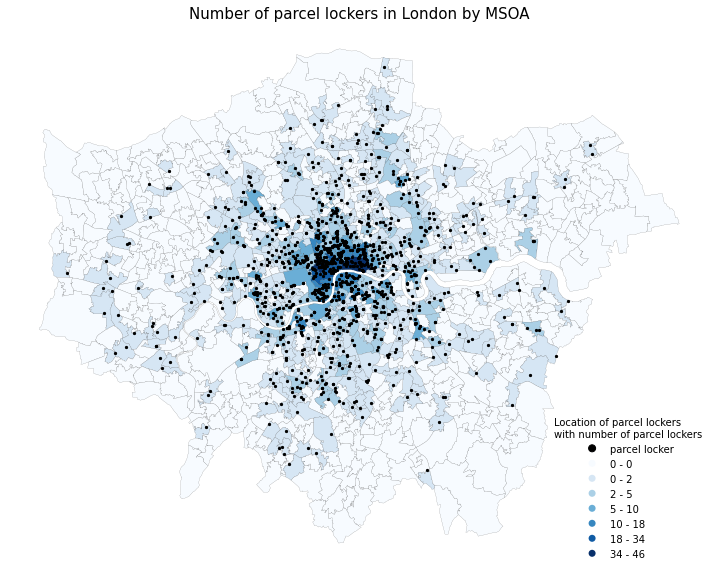

In [34]:
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Number of parcel lockers in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Plot the map
locker_map.plot('Count',
                cmap='Blues',
                edgecolor='black',
                linewidth=0.1,
                ax=ax,
                scheme='NaturalBreaks',
                k=7,
                legend=True,
                # legend_kwds={'label':"parcel numbers"}
                )

sjoined_locker.plot(ax=ax, 
                    marker='o', 
                    color='black', 
                    markersize=5, 
                    label = 'parcel locker')

class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

bp = mc.FisherJenks(locker_map.Count, k=7)
bins = [0] + bp.bins.tolist()
cmap = plt.get_cmap('Blues')

LegendElement = [mpatches.Circle(xy = (0,0), radius = 5, color = 'black', label = 'parcel locker')] +\
    [mpatches.Circle(xy = (0.5,0.5), radius = 5, facecolor=cmap(_ / 6), 
                     label = f'{int(bins[_])} - {int(bins[_+1])}') for _ in range(7)]
                

ax.legend(handles = LegendElement, loc='lower right',title='Location of parcel lockers \nwith number of parcel lockers',
          handler_map={mpatches.Circle: HandlerEllipse()},
          frameon = False
          )

### k-dist

In [43]:
import requests, time
from math import sin, asin, cos, sqrt, radians
import numpy
import matplotlib
import pylab
from scipy.cluster.vq import kmeans2, whiten

from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
def haversine(lonlat1, lonlat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lat1, lon1 = lonlat1
    lat2, lon2 = lonlat2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r * 1000

In [45]:
df = sjoined_locker[['longitude', 'latitude']] 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344 entries, 0 to 1487
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  1344 non-null   float64
 1   latitude   1344 non-null   float64
dtypes: float64(2)
memory usage: 31.5 KB


In [47]:
distance_matrix = squareform(pdist(df, (lambda u, v: haversine(u, v))))

In [40]:
import seaborn as sns

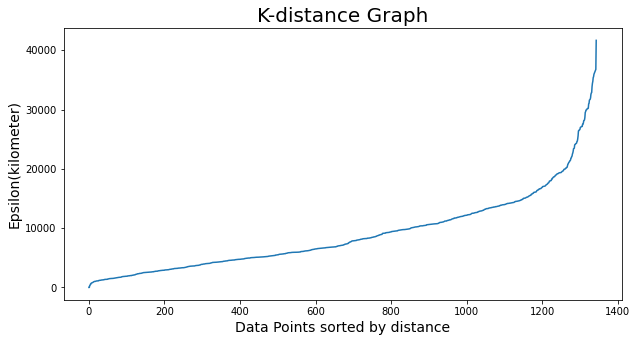

In [41]:
# Plotting K-distance Graph
distance_matrix = np.sort(distance_matrix, axis=0)
distance_matrix = distance_matrix[:,1]
plt.figure(figsize=(10,5))
plt.plot(distance_matrix)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon(kilometer)',fontsize=14)
fig.set_facecolor('w')
plt.show()

In [48]:
db = DBSCAN(eps=1000, min_samples=4, metric='precomputed')  # using "precomputed" as recommended
y_db = db.fit_predict(distance_matrix)

dict_keys([0.0, -1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 18.0, 20.0, 6.0, 14.0, 7.0, 28.0, 8.0, 29.0, 13.0, 9.0, 10.0, 11.0, 12.0, 25.0, 31.0, 15.0, 26.0, 16.0, 27.0, 17.0, 19.0, 21.0, 30.0, 22.0, 23.0, 24.0])
0.0 :  [(-0.1279207, 51.516654), (-0.09715979999999999, 51.527151), (-0.0846847, 51.5105267), (-0.1338282, 51.50835679999999), (-0.13404, 51.49849409999999), (-0.1436653, 51.5217874), (-0.1368829, 51.5147315), (-0.1251302, 51.524606), (-0.1482528, 51.5116078), (-0.1441, 51.4889), (-0.094189, 51.4968501), (-0.14752, 51.4946), (-0.1377492, 51.4924888), (-0.1716659, 51.5214203), (-0.1138438, 51.4993697), (-0.0903689, 51.5257823), (-0.08880729999999999, 51.5052313), (-0.1344002, 51.53551119999999), (-0.157342, 51.5212099), (-0.1594211, 51.5227523), (-0.1707611, 51.5185361), (-0.1175638, 51.4892106), (-0.1219929, 51.5105033), (-0.1166638, 51.5401464), (-0.1060261, 51.5201662), (-0.1216208, 51.5199513), (-0.134744, 51.4895651), (-0.1434661, 51.5284016), (-0.0438121, 51.5139031), (-0.1108457, 51.

<ipython-input-49-b2f8460ccb9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = y_db
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


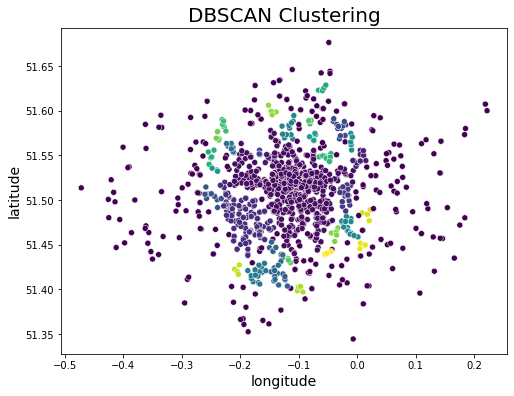

In [49]:
df['cluster'] = y_db

results = {}
for i in df.values:
    if i[2] not in results.keys():
        results[i[2]] = [(i[0], i[1])]
    else:
        if results[i[2]]:
            results[i[2]].append((i[0], i[1]))
        else:
            results[i[2]] = [(i[0], i[1])]
print(results.keys())
for k in results.keys():
    print(k, ": ", results[k])

plt.figure(figsize=(8,6))

sns.scatterplot(df['longitude'], df['latitude'], c=df['cluster'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('longitude',fontsize=14)
plt.ylabel('latitude',fontsize=14)
#plt.legend(True)
plt.show()





In [50]:
df.values

array([[-0.1279207, 51.516654 ,  0.       ],
       [-0.0971598, 51.527151 ,  0.       ],
       [-0.0846847, 51.5105267,  0.       ],
       ...,
       [-0.1842327, 51.5375071,  0.       ],
       [-0.19911  , 51.36625  , -1.       ],
       [-0.3498124, 51.4338667, -1.       ]])

In [51]:
df

longitude   latitude  cluster
0     -0.127921  51.516654        0
1     -0.097160  51.527151        0
2     -0.084685  51.510527        0
3     -0.133828  51.508357        0
4     -0.134040  51.498494        0
...         ...        ...      ...
1483  -0.155977  51.420870       12
1484  -0.127300  51.573630       13
1485  -0.184233  51.537507        0
1486  -0.199110  51.366250       -1
1487  -0.349812  51.433867       -1

[1344 rows x 3 columns]

In [52]:
nums, clus=[],[]
for i in set(df.cluster):
   num=df.loc[df.cluster==i].shape[0]
   nums.append(num)
   clus.append(i)

dfnum=pd.DataFrame([nums,clus]).T

In [53]:
dfnum

0   1
0   739   0
1     6   1
2    12   2
3   129   3
4    22   4
5     6   5
6    14   6
7    12   7
8     6   8
9     5   9
10   15  10
11   10  11
12   15  12
13   12  13
14   16  14
15    6  15
16    4  16
17    5  17
18    5  18
19    5  19
20    9  20
21    5  21
22    4  22
23    4  23
24    5  24
25    5  25
26    4  26
27    4  27
28    4  28
29    4  29
30    4  30
31    4  31
32  244  -1

In [54]:
# Add Geometry and Reproject
gdf = gpd.GeoDataFrame(df, 
      geometry=gpd.points_from_xy(df['longitude'], df['latitude'], crs='epsg:4326'))
gdf = gdf.to_crs('epsg:27700')

In [55]:
gdf['cluster'] = gdf['cluster'].astype(str)

In [56]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1344 entries, 0 to 1487
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   longitude  1344 non-null   float64 
 1   latitude   1344 non-null   float64 
 2   cluster    1344 non-null   object  
 3   geometry   1344 non-null   geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 52.5+ KB


<AxesSubplot:title={'center':'Clusters of parcel lockers in London by MSOA'}>

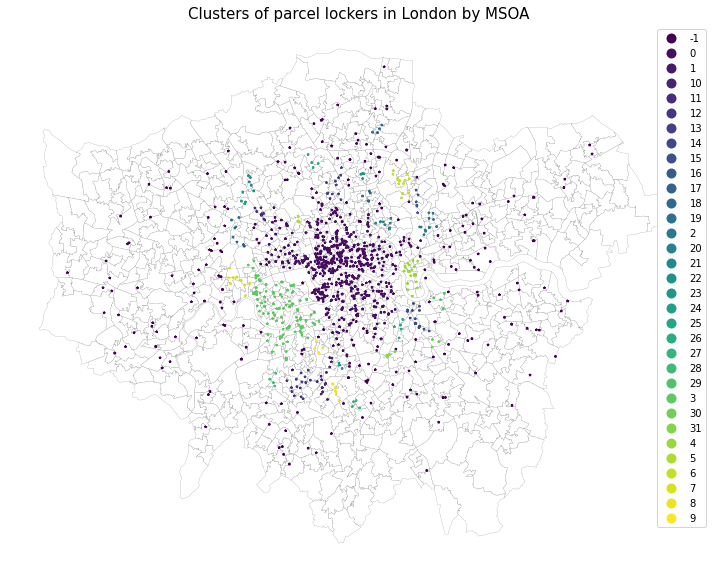

In [57]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.axis('off')
ax.set_title('Clusters of parcel lockers in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

#locker_map.plot(edgecolor='black', facecolor='white', linewidth=0.1)

locker_map.plot(#column='cluster',
                #cmap='viridis',
                edgecolor='black',
                #markersize=5,
                facecolor='white',
              
                linewidth=0.1,
                ax=ax)
                #edgecolor='1',
                #scheme='NaturalBreaks',
                #k=6,
                #legend=True,
                #legend_kwds={'loc': 'lower right'})

gdf.plot(column='cluster',
                cmap='viridis', marker='*',
                #edgecolor='black',
                markersize=5,
              
              #linewidth=0.1,
                ax=ax,
                #edgecolor='1',
                #scheme='userdefined',
          #classification_kwds={'bins':[-1, 0, 5, 10, 15, 20, 25, 31]},
              #facecolor='white',
               # k=10, label = 'clusters',
                legend=True)
         
                #legend_kwds={'loc': 'lower right', 'facecolor':'white'})

#'title': 'Number of parcel lockers'

In [58]:
#calculate violent crime
df_cluster = pd.merge(sjoined_locker, df, left_on='longitude', right_on='longitude', how='left')

In [59]:
df_cluster

name  latitude_x  longitude  \
0              New Oxford Street Post Office   51.516654  -0.127921   
1                 Central Street Post Office   51.527151  -0.097160   
2                 City of London Post Office   51.510527  -0.084685   
3                 City of London Post Office   51.510527  -0.084685   
4      Regent Street St. James’s Post Office   51.508357  -0.133828   
...                                      ...         ...        ...   
1429       24/7 InPost Locker - Seely Stores   51.420870  -0.155977   
1430    24/7 InPost Locker - BP Hornsey Rise   51.573630  -0.127300   
1431  24/7 InPost Locker - Londis Abbey Road   51.537507  -0.184233   
1432          InPost Locker - Carlton Stores   51.366250  -0.199110   
1433                           InPost Locker   51.433867  -0.349812   

                         geometry_x   MSOA11CD                  MSOA11NM  \
0     POINT (529994.047 181408.957)  E02000193                Camden 028   
1     POINT (532097.914 182631.304)  E02000576             Islington 023   
2     POINT (533011.635 180805.211)  E02000001        City of London 001   
3     POINT (533011.635 180805.211)  E02000001        City of London 001   
4     POINT (529607.705 180475.810)  E02000977           Westminster 018   
...                             ...        ...                       ...   
1429  POINT (528315.673 170708.027)  E02000695                Merton 007   
1430  POINT (529874.906 187746.021)  E02000554             Islington 001   
1431  POINT (526029.495 183629.472)  E02000961           Westminster 002   
1432  POINT (525465.986 164559.588)  E02000853                Sutton 014   
1433  POINT (514806.198 171832.041)  E02000801  Richmond upon Thames 018   

        LAD11CD               LAD11NM  latitude_y  cluster  \
0     E09000007                Camden   51.516654        0   
1     E09000019             Islington   51.527151        0   
2     E09000001        City of London   51.510527        0   
3     E09000001        City of London   51.510527        0   
4     E09000033           Westminster   51.508357        0   
...         ...                   ...         ...      ...   
1429  E09000024                Merton   51.420870       12   
1430  E09000019             Islington   51.573630       13   
1431  E09000033           Westminster   51.537507        0   
1432  E09000029                Sutton   51.366250       -1   
1433  E09000027  Richmond upon Thames   51.433867       -1   

                     geometry_y  
0     POINT (-0.12792 51.51665)  
1     POINT (-0.09716 51.52715)  
2     POINT (-0.08468 51.51053)  
3     POINT (-0.08468 51.51053)  
4     POINT (-0.13383 51.50836)  
...                         ...  
1429  POINT (-0.15598 51.42087)  
1430  POINT (-0.12730 51.57363)  
1431  POINT (-0.18423 51.53751)  
1432  POINT (-0.19911 51.36625)  
1433  POINT (-0.34981 51.43387)  

[1434 rows x 11 columns]

In [60]:
#group by Borough and crime categrate
df_cluster['number'] = 1
df_cluster_num = df_cluster.groupby(['cluster'])[['number']].sum()

In [61]:
df_cluster

name  latitude_x  longitude  \
0              New Oxford Street Post Office   51.516654  -0.127921   
1                 Central Street Post Office   51.527151  -0.097160   
2                 City of London Post Office   51.510527  -0.084685   
3                 City of London Post Office   51.510527  -0.084685   
4      Regent Street St. James’s Post Office   51.508357  -0.133828   
...                                      ...         ...        ...   
1429       24/7 InPost Locker - Seely Stores   51.420870  -0.155977   
1430    24/7 InPost Locker - BP Hornsey Rise   51.573630  -0.127300   
1431  24/7 InPost Locker - Londis Abbey Road   51.537507  -0.184233   
1432          InPost Locker - Carlton Stores   51.366250  -0.199110   
1433                           InPost Locker   51.433867  -0.349812   

                         geometry_x   MSOA11CD                  MSOA11NM  \
0     POINT (529994.047 181408.957)  E02000193                Camden 028   
1     POINT (532097.914 182631.304)  E02000576             Islington 023   
2     POINT (533011.635 180805.211)  E02000001        City of London 001   
3     POINT (533011.635 180805.211)  E02000001        City of London 001   
4     POINT (529607.705 180475.810)  E02000977           Westminster 018   
...                             ...        ...                       ...   
1429  POINT (528315.673 170708.027)  E02000695                Merton 007   
1430  POINT (529874.906 187746.021)  E02000554             Islington 001   
1431  POINT (526029.495 183629.472)  E02000961           Westminster 002   
1432  POINT (525465.986 164559.588)  E02000853                Sutton 014   
1433  POINT (514806.198 171832.041)  E02000801  Richmond upon Thames 018   

        LAD11CD               LAD11NM  latitude_y  cluster  \
0     E09000007                Camden   51.516654        0   
1     E09000019             Islington   51.527151        0   
2     E09000001        City of London   51.510527        0   
3     E09000001        City of London   51.510527        0   
4     E09000033           Westminster   51.508357        0   
...         ...                   ...         ...      ...   
1429  E09000024                Merton   51.420870       12   
1430  E09000019             Islington   51.573630       13   
1431  E09000033           Westminster   51.537507        0   
1432  E09000029                Sutton   51.366250       -1   
1433  E09000027  Richmond upon Thames   51.433867       -1   

                     geometry_y  number  
0     POINT (-0.12792 51.51665)       1  
1     POINT (-0.09716 51.52715)       1  
2     POINT (-0.08468 51.51053)       1  
3     POINT (-0.08468 51.51053)       1  
4     POINT (-0.13383 51.50836)       1  
...                         ...     ...  
1429  POINT (-0.15598 51.42087)       1  
1430  POINT (-0.12730 51.57363)       1  
1431  POINT (-0.18423 51.53751)       1  
1432  POINT (-0.19911 51.36625)       1  
1433  POINT (-0.34981 51.43387)       1  

[1434 rows x 12 columns]

In [62]:
df_cluster_num

number
cluster        
-1          244
 0          819
 1            6
 2           12
 3          137
 4           22
 5            6
 6           14
 7           12
 8            6
 9            5
 10          15
 11          10
 12          15
 13          12
 14          16
 15           6
 16           4
 17           5
 18           5
 19           5
 20           9
 21           5
 22           4
 23           4
 24           7
 25           5
 26           4
 27           4
 28           4
 29           4
 30           4
 31           4

In [63]:
plt.figure(figsize=(12,6))
figure,axes = plt.subplots(1,1,figsize = (12,6),dpi = 1000)
data = [244, 819, 6, 12, 137, 22, 6, 14, 12, 6, 5, 15, 10, 15, 12, 16, 6, 4, 5, 5, 5, 9, 5, 4, 4, 7, 5, 4, 4, 4,4, 4, 4]
labels = ["-1", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11","12", "13", "14",
         "15","16","17", "18", "19", "20", "21", "22","23", "24","25","26","27","28","29","30","31"]
N = 33
x = np.arange(N)


colors = ["#86BCB6","#E19D9A","#A0CBE8", "#A0CBE8","#E19D9A","#A0CBE8","#A0CBE8","#A0CBE8",
          "#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8",
          "#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8",
          "#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8","#A0CBE8",
          "#A0CBE8"]

plt.bar(range(len(data)), data, tick_label=labels,color = colors)


for i,j in zip(x, data):
    plt.text(i, j+0.05, '%.0f' % j, ha='center', va= 'bottom',fontsize=7) 

plt.title("Number of parcel lockers in each clusters in London",fontdict={'fontsize': '15', 'fontweight' : '3'})

[axes.spines[loc_axis].set_visible(False) for loc_axis in ['top','right','bottom','left']]

axes.set_yticks([])
plt.xlabel('Clusters')
plt.ylabel('number of parcel lockers')
        
plt.show()

<Figure size 864x432 with 0 Axes>

In [64]:
# Tidy up
to_drop = ['latitude_y']
df_cluster.drop(columns=to_drop, inplace=True)
df_cluster = df_cluster.rename(columns={'latitude_x':'latitude'})

In [65]:
df_cluster.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1434 entries, 0 to 1433
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        1434 non-null   object  
 1   latitude    1434 non-null   float64 
 2   longitude   1434 non-null   float64 
 3   geometry_x  1434 non-null   geometry
 4   MSOA11CD    1434 non-null   object  
 5   MSOA11NM    1434 non-null   object  
 6   LAD11CD     1434 non-null   object  
 7   LAD11NM     1434 non-null   object  
 8   cluster     1434 non-null   int64   
 9   geometry_y  1434 non-null   geometry
 10  number      1434 non-null   int64   
dtypes: float64(2), geometry(2), int64(2), object(5)
memory usage: 134.4+ KB


In [66]:
df_cluster.loc[df_cluster['cluster'] != -1, 'new_cluster'] = 1
df_cluster.loc[df_cluster['cluster'] == -1, 'new_cluster'] = 0

df_cluster['new_cluster'] = df_cluster['new_cluster'].astype(int)

In [67]:
df_cluster

name   latitude  longitude  \
0              New Oxford Street Post Office  51.516654  -0.127921   
1                 Central Street Post Office  51.527151  -0.097160   
2                 City of London Post Office  51.510527  -0.084685   
3                 City of London Post Office  51.510527  -0.084685   
4      Regent Street St. James’s Post Office  51.508357  -0.133828   
...                                      ...        ...        ...   
1429       24/7 InPost Locker - Seely Stores  51.420870  -0.155977   
1430    24/7 InPost Locker - BP Hornsey Rise  51.573630  -0.127300   
1431  24/7 InPost Locker - Londis Abbey Road  51.537507  -0.184233   
1432          InPost Locker - Carlton Stores  51.366250  -0.199110   
1433                           InPost Locker  51.433867  -0.349812   

                         geometry_x   MSOA11CD                  MSOA11NM  \
0     POINT (529994.047 181408.957)  E02000193                Camden 028   
1     POINT (532097.914 182631.304)  E02000576             Islington 023   
2     POINT (533011.635 180805.211)  E02000001        City of London 001   
3     POINT (533011.635 180805.211)  E02000001        City of London 001   
4     POINT (529607.705 180475.810)  E02000977           Westminster 018   
...                             ...        ...                       ...   
1429  POINT (528315.673 170708.027)  E02000695                Merton 007   
1430  POINT (529874.906 187746.021)  E02000554             Islington 001   
1431  POINT (526029.495 183629.472)  E02000961           Westminster 002   
1432  POINT (525465.986 164559.588)  E02000853                Sutton 014   
1433  POINT (514806.198 171832.041)  E02000801  Richmond upon Thames 018   

        LAD11CD               LAD11NM  cluster                 geometry_y  \
0     E09000007                Camden        0  POINT (-0.12792 51.51665)   
1     E09000019             Islington        0  POINT (-0.09716 51.52715)   
2     E09000001        City of London        0  POINT (-0.08468 51.51053)   
3     E09000001        City of London        0  POINT (-0.08468 51.51053)   
4     E09000033           Westminster        0  POINT (-0.13383 51.50836)   
...         ...                   ...      ...                        ...   
1429  E09000024                Merton       12  POINT (-0.15598 51.42087)   
1430  E09000019             Islington       13  POINT (-0.12730 51.57363)   
1431  E09000033           Westminster        0  POINT (-0.18423 51.53751)   
1432  E09000029                Sutton       -1  POINT (-0.19911 51.36625)   
1433  E09000027  Richmond upon Thames       -1  POINT (-0.34981 51.43387)   

      number  new_cluster  
0          1            1  
1          1            1  
2          1            1  
3          1            1  
4          1            1  
...      ...          ...  
1429       1            1  
1430       1            1  
1431       1            1  
1432       1            0  
1433       1            0  

[1434 rows x 12 columns]

In [68]:
# divide into 2 clusters
df_cluster1 = df_cluster[['latitude', 'longitude', 'new_cluster']]

In [69]:
df_cluster1

latitude  longitude  new_cluster
0     51.516654  -0.127921            1
1     51.527151  -0.097160            1
2     51.510527  -0.084685            1
3     51.510527  -0.084685            1
4     51.508357  -0.133828            1
...         ...        ...          ...
1429  51.420870  -0.155977            1
1430  51.573630  -0.127300            1
1431  51.537507  -0.184233            1
1432  51.366250  -0.199110            0
1433  51.433867  -0.349812            0

[1434 rows x 3 columns]

In [70]:
# Add Geometry and Reproject
gdf_cluster1 = gpd.GeoDataFrame(df_cluster1, 
               geometry=gpd.points_from_xy(df_cluster1['longitude'],df_cluster1['latitude'], crs='epsg:4326'))
gdf_cluster1 = gdf_cluster1.to_crs('epsg:27700')

In [71]:
gdf_cluster1

latitude  longitude  new_cluster                       geometry
0     51.516654  -0.127921            1  POINT (529994.047 181408.957)
1     51.527151  -0.097160            1  POINT (532097.914 182631.304)
2     51.510527  -0.084685            1  POINT (533011.635 180805.211)
3     51.510527  -0.084685            1  POINT (533011.635 180805.211)
4     51.508357  -0.133828            1  POINT (529607.705 180475.810)
...         ...        ...          ...                            ...
1429  51.420870  -0.155977            1  POINT (528315.673 170708.027)
1430  51.573630  -0.127300            1  POINT (529874.906 187746.021)
1431  51.537507  -0.184233            1  POINT (526029.495 183629.472)
1432  51.366250  -0.199110            0  POINT (525465.986 164559.588)
1433  51.433867  -0.349812            0  POINT (514806.198 171832.041)

[1434 rows x 4 columns]

In [72]:
gdf_cluster1['new_cluster'] = gdf_cluster1['new_cluster'].astype(str)

<AxesSubplot:title={'center':'Clusters of parcel lockers in London by MSOA'}>

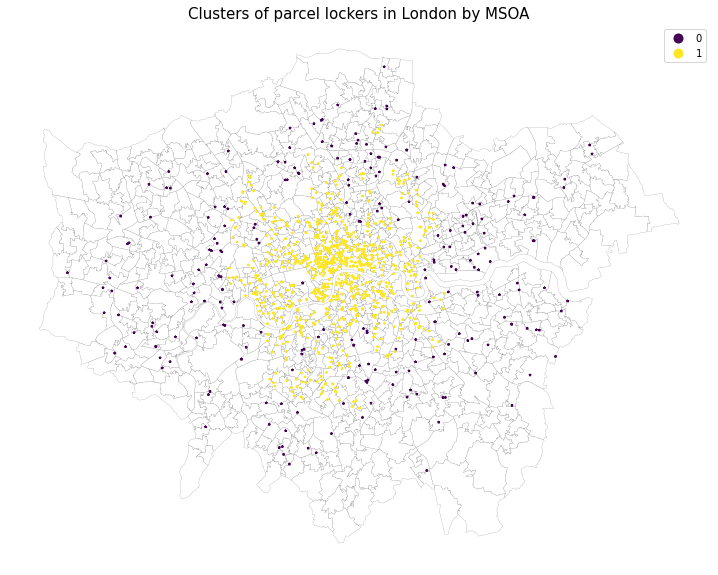

In [73]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.axis('off')
ax.set_title('Clusters of parcel lockers in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

#locker_map.plot(edgecolor='black', facecolor='white', linewidth=0.1)

locker_map.plot(#column='cluster',
                #cmap='viridis',
                edgecolor='black',
                #markersize=5,
                facecolor='white',
              
                linewidth=0.1,
                ax=ax)
                #edgecolor='1',
                #scheme='NaturalBreaks',
                #k=6,
                #legend=True,
                #legend_kwds={'loc': 'lower right'})

gdf_cluster1.plot(column='new_cluster',
                cmap='viridis', marker='*',
                #edgecolor='black',
                markersize=5,
              
              #linewidth=0.1,
                ax=ax,
                #edgecolor='1',
                #scheme='userdefined',
          #classification_kwds={'bins':[-1, 0, 5, 10, 15, 20, 25, 31]},
              #facecolor='white',
               # k=10, label = 'clusters',
                legend=True)
         
                #legend_kwds={'loc': 'lower right', 'facecolor':'white'})

#'title': 'Number of parcel lockers'

In [74]:
#Calculate how many times each cluster appears in cluster 1
df_cluster = df_cluster[['MSOA11CD', 'new_cluster']] 
df_cluster["count"] = 1 
df_cluster

<ipython-input-74-4ee6baa4d2c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster["count"] = 1


MSOA11CD  new_cluster  count
0     E02000193            1      1
1     E02000576            1      1
2     E02000001            1      1
3     E02000001            1      1
4     E02000977            1      1
...         ...          ...    ...
1429  E02000695            1      1
1430  E02000554            1      1
1431  E02000961            1      1
1432  E02000853            0      1
1433  E02000801            0      1

[1434 rows x 3 columns]

In [75]:
df_cluster.to_csv("data/cluster.csv")

## Modelling

In [76]:
# Calculate the number of cluster in R
model_y = pd.read_csv('data/cluster_y_new.csv')

In [77]:
# agglomerationdegree
model_y = model_y[['MSOA11CD', 'count_sum_0', 'count_sum_1']] 
model_y = model_y.rename(columns={'count_sum_0':'cluster_0_degree', 'count_sum_1':'cluster_1_degree'})

In [78]:
model_y

MSOA11CD  cluster_0_degree  cluster_1_degree
0    E02000001                 0                58
1    E02000003                 1                 0
2    E02000005                 1                 0
3    E02000008                 1                 0
4    E02000016                 1                 0
..         ...               ...               ...
464  E02006925                 1                 0
465  E02006928                 0                 2
466  E02006929                 2                 0
467  E02006930                 0                 2
468  E02006931                 0                 3

[469 rows x 3 columns]

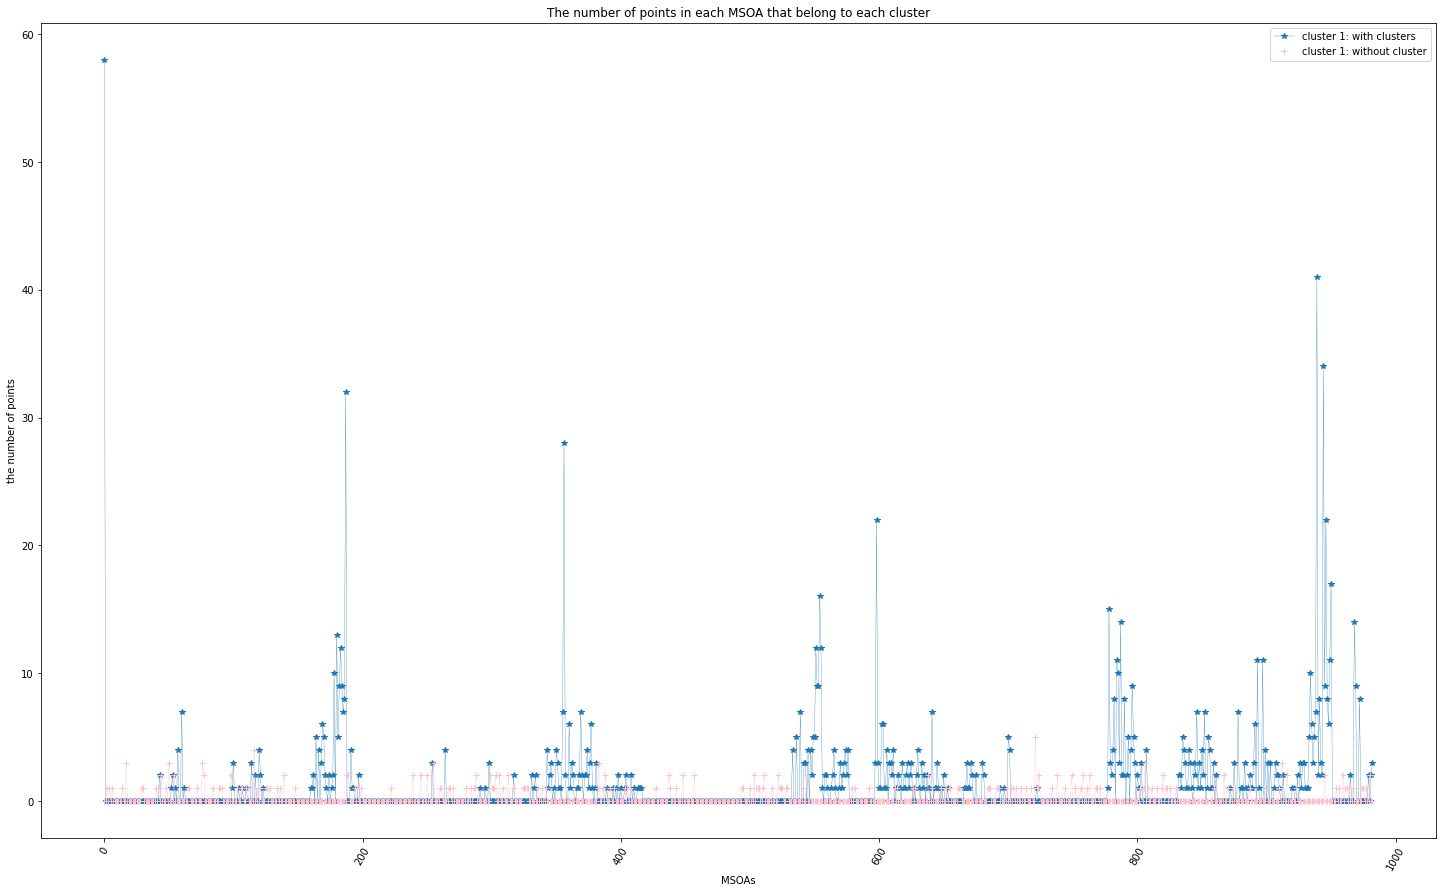

In [79]:
model_y2 = pd.merge(london_areas, model_y, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
model_y2 = model_y2[['MSOA11CD', 'cluster_0_degree', 'cluster_1_degree']]
model_y2['cluster_0_degree'] = model_y2['cluster_0_degree'].fillna(0)
model_y2['cluster_1_degree'] = model_y2['cluster_1_degree'].fillna(0)
model_y2
import matplotlib.pyplot as plt

# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[25, 15])

ax.plot(model_y2['cluster_1_degree'],
        marker='*', linewidth=0.3, label='cluster 1: with clusters')
ax.plot(model_y2['cluster_0_degree'],
        marker='+', linewidth=0.3, color = 'pink',
        label='cluster 1: without cluster')

plt.xticks(rotation=60)
ax.set_xlabel('MSOAs')
ax.set_ylabel('the number of points')
ax.set_title('The number of points in each MSOA that belong to each cluster')
plt.legend()
plt.show()

In [80]:
# merger with msoa data
model_y2 = london_areas.merge(model_y2, 
                             left_on='MSOA11CD', 
                             right_on='MSOA11CD', 
                             how='left')

<AxesSubplot:title={'center':'Number of parcel lockers in Clusters in London by MSOA'}>

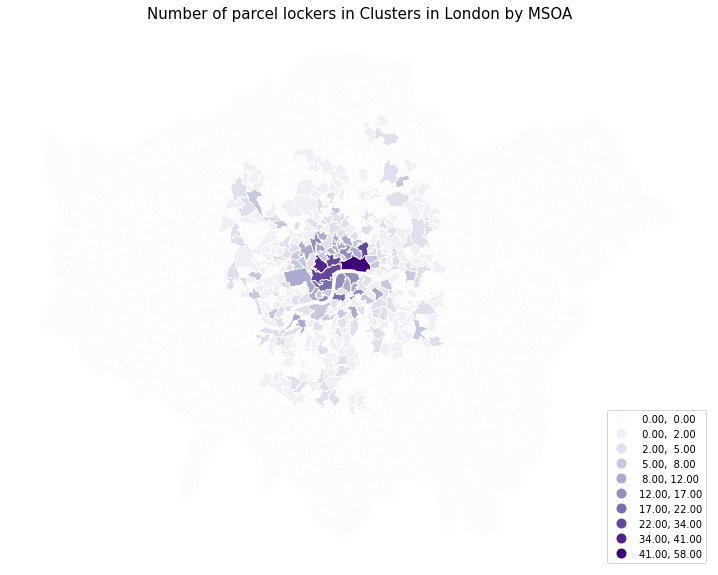

In [81]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Number of parcel lockers in Clusters in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

model_y2.plot(column='cluster_1_degree',
             cmap='Purples',
             linewidth=0.9,
             ax=ax,
             edgecolor='1',
             scheme='NaturalBreaks', 
             k=10,
             legend=True,
             legend_kwds={'loc': 'lower right'})

/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:1718: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:1719: UserWarning: Warning: setting k to 6
  Warn("Warning: setting k to %d" % uvk, UserWarning)


<AxesSubplot:title={'center':'Number of parcel lockers not in Clusters in London by MSOA'}>

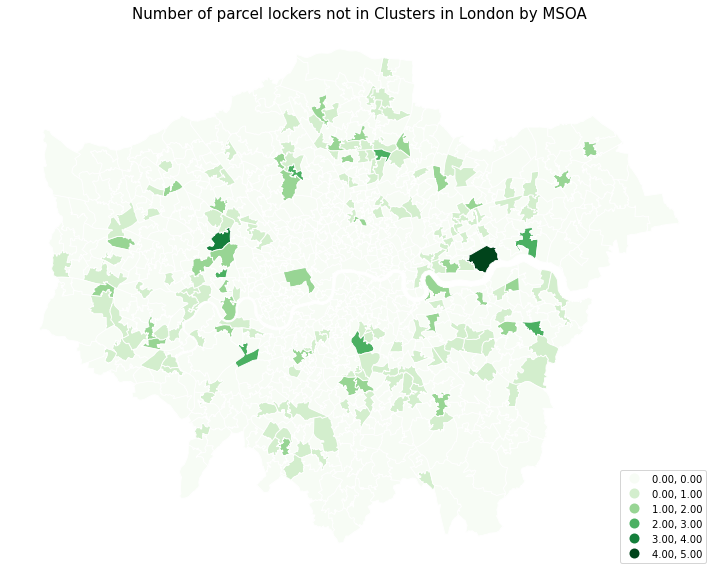

In [82]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Number of parcel lockers not in Clusters in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

model_y2.plot(column='cluster_0_degree',
             cmap='Greens',
             linewidth=0.9,
             ax=ax,
             edgecolor='1',
             scheme='NaturalBreaks', 
             k=10,
             legend=True,
             legend_kwds={'loc': 'lower right'})

In [83]:
model_y = model_y[['MSOA11CD', 'cluster_1_degree']]

In [84]:
model_y.to_csv("data/cluster_classification.csv")

In [85]:
model_y

MSOA11CD  cluster_1_degree
0    E02000001                58
1    E02000003                 0
2    E02000005                 0
3    E02000008                 0
4    E02000016                 0
..         ...               ...
464  E02006925                 0
465  E02006928                 2
466  E02006929                 0
467  E02006930                 2
468  E02006931                 3

[469 rows x 2 columns]

In [86]:
model_y = pd.merge(london_areas, model_y, left_on='MSOA11CD', right_on='MSOA11CD', how='left')

In [87]:
model_y = model_y[['MSOA11CD', 'cluster_1_degree']]
model_y['cluster_1_degree'] = model_y['cluster_1_degree'].fillna(0)

In [88]:
model_y

MSOA11CD  cluster_1_degree
0    E02000001              58.0
1    E02000002               0.0
2    E02000003               0.0
3    E02000004               0.0
4    E02000005               0.0
..         ...               ...
978  E02006927               0.0
979  E02006928               2.0
980  E02006929               0.0
981  E02006930               2.0
982  E02006931               3.0

[983 rows x 2 columns]

In [89]:
#set(model_y.cluster_1_degree)

In [90]:
# Read restaurant data
rest_x1 = pd.read_csv('final_data/restaurants_final.csv')
rest_x1 = rest_x1[['MSOA11CD', 'Count']]
rest_x1 = rest_x1 .rename(columns={'Count':'restaurant'})

In [91]:
rest_x1

MSOA11CD  restaurant
0    E02000001       243.0
1    E02000002         0.0
2    E02000003         3.0
3    E02000004         0.0
4    E02000005         1.0
..         ...         ...
978  E02006927         1.0
979  E02006928         0.0
980  E02006929        29.0
981  E02006930        13.0
982  E02006931         2.0

[983 rows x 2 columns]

In [92]:
# Read education data
edu_x2 = pd.read_csv('final_data/education_final.csv')
edu_x2 = edu_x2[['MSOA11CD', 'Adult HE Rate']]
edu_x2 = edu_x2 .rename(columns={'Adult HE Rate':'edu_rate'})
edu_x2

MSOA11CD  edu_rate
0    E02000001     0.684
1    E02000002     0.182
2    E02000003     0.235
3    E02000004     0.179
4    E02000005     0.176
..         ...       ...
978  E02006927     0.371
979  E02006928     0.430
980  E02006929     0.463
981  E02006930     0.529
982  E02006931     0.554

[983 rows x 2 columns]

### Area size data

In [93]:
# Read MSOA area size data (Measurements are given in hectares (10,000 square metres))
area_size = pd.read_excel('final_data/SAM_for_2011_Census_Areas/SAM_MSOA_DEC_2011_EW.xlsx')
area_size = area_size[['MSOA11CD', 'AREAEHECT']]
area_size = area_size .rename(columns={'AREAEHECT':'area'})
area_size

MSOA11CD      area
0     E02000001    315.14
1     E02000002    216.15
2     E02000003    214.15
3     E02000004    249.28
4     E02000005    118.81
...         ...       ...
7196  W02000419    271.67
7197  W02000420   7919.18
7198  W02000421  77007.04
7199  W02000422    838.07
7200  W02000423    206.53

[7201 rows x 2 columns]

In [94]:
# Read poplation data
pop_x3 = pd.read_csv('final_data/population_final.csv')
pop_x3 = pop_x3[['MSOA11CD', 'All Ages']]
pop_x3 = pop_x3 .rename(columns={'All Ages':'population'})
pop_x3

MSOA11CD  population
0    E02000001       10938
1    E02000002        7726
2    E02000003       11246
3    E02000004        6646
4    E02000005       10540
..         ...         ...
978  E02006927       10680
979  E02006928       12660
980  E02006929       13649
981  E02006930        9263
982  E02006931        9764

[983 rows x 2 columns]

In [95]:
# Read income data
income_x4 = pd.read_csv('final_data/income_final.csv')
income_x4 = income_x4[['MSOA11CD', 'Total annual income (£)']]
income_x4 = income_x4 .rename(columns={'Total annual income (£)':'income'})
income_x4

MSOA11CD  income
0    E02000001   65400
1    E02000002   39000
2    E02000003   47800
3    E02000004   43700
4    E02000005   44900
..         ...     ...
978  E02006927   53200
979  E02006928   57500
980  E02006929   58500
981  E02006930   63600
982  E02006931   61400

[983 rows x 2 columns]

In [96]:
# Read workplace data
workplace_x5 = pd.read_csv('final_data/workplace_final.csv')
workplace_x5 = workplace_x5[['MSOA11CD', 'workplace']]
#workplace_x5 = workplace_x5 .rename(columns={'Total annual income (£)':'income'})
workplace_x5

MSOA11CD  workplace
0    E02000001    26500.0
1    E02000002      240.0
2    E02000003      570.0
3    E02000004      170.0
4    E02000005      320.0
..         ...        ...
978  E02006927      430.0
979  E02006928      650.0
980  E02006929      955.0
981  E02006930      575.0
982  E02006931      735.0

[983 rows x 2 columns]

In [97]:
# Read workplace data
employee_x6 = pd.read_csv('final_data/employee_final.csv')
employee_x6 = employee_x6[['MSOA11CD', 'employee']]
#workplace_x5 = employee_x6 .rename(columns={'Total annual income (£)':'income'})
employee_x6

MSOA11CD  employee
0    E02000001  517000.0
1    E02000002    1000.0
2    E02000003    3500.0
3    E02000004    1250.0
4    E02000005    1250.0
..         ...       ...
978  E02006927    2500.0
979  E02006928    4000.0
980  E02006929   13000.0
981  E02006930    3500.0
982  E02006931    5000.0

[983 rows x 2 columns]

In [98]:
# Read transport data
transport_x7 = pd.read_csv('final_data/transport_final.csv')
transport_x7 = transport_x7[['MSOA11CD', 'PTAI']]
#transport_x7 = transport_x7 .rename(columns={'Total annual income (£)':'income'})
transport_x7

MSOA11CD       PTAI
0    E02000001   4.858553
1    E02000002   0.290854
2    E02000003   6.985213
3    E02000004   4.859534
4    E02000005   1.901569
..         ...        ...
978  E02006927  22.184893
979  E02006928  13.974806
980  E02006929   6.577844
981  E02006930  15.227443
982  E02006931   9.263306

[983 rows x 2 columns]

In [99]:
# Read railway data
railway_x8 = pd.read_csv('final_data/railway_final.csv')
railway_x8 = railway_x8[['MSOA11CD', 'Count']]
railway_x8 = railway_x8 .rename(columns={'Count':'rail_sta'})
railway_x8

MSOA11CD  rail_sta
0    E02000001       6.0
1    E02000002       0.0
2    E02000003       0.0
3    E02000004       0.0
4    E02000005       0.0
..         ...       ...
978  E02006927       1.0
979  E02006928       1.0
980  E02006929       1.0
981  E02006930       1.0
982  E02006931       0.0

[983 rows x 2 columns]

In [100]:
# Read underground data
underground_x9 = pd.read_csv('final_data/underground_final.csv')
underground_x9 = underground_x9[['MSOA11CD', 'Count']]
underground_x9 = underground_x9 .rename(columns={'Count':'under_sta'})
underground_x9

MSOA11CD  under_sta
0    E02000001        6.0
1    E02000002        0.0
2    E02000003        0.0
3    E02000004        0.0
4    E02000005        0.0
..         ...        ...
978  E02006927        1.0
979  E02006928        1.0
980  E02006929        1.0
981  E02006930        1.0
982  E02006931        0.0

[983 rows x 2 columns]

In [101]:
# Read supermarket data
supermarket_x10 = pd.read_csv('final_data/supermarket_final.csv')
supermarket_x10 = supermarket_x10[['MSOA11CD', 'Count']]
supermarket_x10 ['Count'] = supermarket_x10 ['Count'].fillna(0)
supermarket_x10 = supermarket_x10.rename(columns={'Count':'supermarket'})
supermarket_x10

MSOA11CD  supermarket
0    E02000001         35.0
1    E02000002          1.0
2    E02000003          2.0
3    E02000004          1.0
4    E02000005          3.0
..         ...          ...
978  E02006927          3.0
979  E02006928          5.0
980  E02006929          9.0
981  E02006930          6.0
982  E02006931          4.0

[983 rows x 2 columns]

In [102]:
#num_rest.to_csv("final_data/restaurants_final.csv")
# Read bus data
bus_x11 = pd.read_csv('final_data/bus_final.csv')
bus_x11 = bus_x11[['MSOA11CD', 'Count']]
bus_x11['Count'] = bus_x11 ['Count'].fillna(0)
bus_x11 = bus_x11.rename(columns={'Count':'bus_stop'})
bus_x11

MSOA11CD  bus_stop
0    E02000001     121.0
1    E02000002      20.0
2    E02000003      18.0
3    E02000004      14.0
4    E02000005      11.0
..         ...       ...
978  E02006927      38.0
979  E02006928      14.0
980  E02006929      34.0
981  E02006930      23.0
982  E02006931      27.0

[983 rows x 2 columns]

In [103]:
#num_rest.to_csv("final_data/restaurants_final.csv")
# Read bus data
house_x12 = pd.read_excel('final_data/houseprice_final.xlsx')
house_x12 = house_x12[['Code', 'Value']]
house_x12 = house_x12.rename(columns={'Value':'houseprice'})
house_x12
#house_x12['Count'] = bus_x11 ['Count'].fillna(0)
#house_x12 = house_x12.rename(columns={'Value':'houseprice'})
#house_x12

Code  houseprice
0    E02000001      835000
1    E02000002      313750
2    E02000003      330000
3    E02000004      340000
4    E02000005      315500
..         ...         ...
978  E02000979     1270000
979  E02000980      995000
980  E02000981      845000
981  E02000982      800000
982  E02000983      705000

[983 rows x 2 columns]

In [104]:
y_x1 = pd.merge(model_y, rest_x1, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
y_x2 = pd.merge(y_x1, edu_x2, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
y_x3 = pd.merge(y_x2, pop_x3, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
y_x4 = pd.merge(y_x3, income_x4, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
y_x5 = pd.merge(y_x4, workplace_x5, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
y_x6 = pd.merge(y_x5, employee_x6, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
y_x7 = pd.merge(y_x6, transport_x7, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
y_x8 = pd.merge(y_x7, railway_x8, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
y_x9 = pd.merge(y_x8, underground_x9, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
y_x10 = pd.merge(y_x9, supermarket_x10, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
y_x11 = pd.merge(y_x10, bus_x11, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
y_x12 = pd.merge(y_x11, house_x12, left_on='MSOA11CD', right_on='Code', how='left')
model = pd.merge(y_x12, area_size, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
#model = pd.merge(num_locker, model, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
#model['Count'] = model['Count'].fillna(0)
model

MSOA11CD  cluster_1_degree  restaurant  edu_rate  population  income  \
0    E02000001              58.0       243.0     0.684       10938   65400   
1    E02000002               0.0         0.0     0.182        7726   39000   
2    E02000003               0.0         3.0     0.235       11246   47800   
3    E02000004               0.0         0.0     0.179        6646   43700   
4    E02000005               0.0         1.0     0.176       10540   44900   
..         ...               ...         ...       ...         ...     ...   
978  E02006927               0.0         1.0     0.371       10680   53200   
979  E02006928               2.0         0.0     0.430       12660   57500   
980  E02006929               0.0        29.0     0.463       13649   58500   
981  E02006930               2.0        13.0     0.529        9263   63600   
982  E02006931               3.0         2.0     0.554        9764   61400   

     workplace  employee       PTAI  rail_sta  under_sta  supermarket  \
0      26500.0  517000.0   4.858553       6.0        6.0         35.0   
1        240.0    1000.0   0.290854       0.0        0.0          1.0   
2        570.0    3500.0   6.985213       0.0        0.0          2.0   
3        170.0    1250.0   4.859534       0.0        0.0          1.0   
4        320.0    1250.0   1.901569       0.0        0.0          3.0   
..         ...       ...        ...       ...        ...          ...   
978      430.0    2500.0  22.184893       1.0        1.0          3.0   
979      650.0    4000.0  13.974806       1.0        1.0          5.0   
980      955.0   13000.0   6.577844       1.0        1.0          9.0   
981      575.0    3500.0  15.227443       1.0        1.0          6.0   
982      735.0    5000.0   9.263306       0.0        0.0          4.0   

     bus_stop       Code  houseprice    area  
0       121.0  E02000001      835000  315.14  
1        20.0  E02000002      313750  216.15  
2        18.0  E02000003      330000  214.15  
3        14.0  E02000004      340000  249.28  
4        11.0  E02000005      315500  118.81  
..        ...        ...         ...     ...  
978      38.0  E02006927      470000  252.11  
979      14.0  E02006928      472500   74.85  
980      34.0  E02006929      545000  361.48  
981      23.0  E02006930      485000   86.77  
982      27.0  E02006931      545000  204.91  

[983 rows x 16 columns]

In [105]:
model.to_csv("model.csv")

In [106]:
model['rest_density'] = model['restaurant'] / model['area']
model['pop_density'] = model['population'] / model['area']
#model['lnpopulation'] = np.log(model.population)
model['income_density'] = model['income'] / model['area']
model['lnincome'] = np.log(model.income)
#model['edu_rate'] = np.log(model.edu_rate)
#model['lnhouseprice'] = np.log(model.houseprice)
model['hou_density'] = model['houseprice'] / model['area']
model['lnhouseprice'] = np.log(model.houseprice)
model['workplace_density'] = model['workplace'] / model['area']
model['employee_density'] = model['employee'] / model['area']
model['rail_density'] = model['rail_sta'] / model['area']
model['under_density'] = model['under_sta'] / model['area']
model['market_density'] = model['supermarket'] / model['area']
model['bus_density'] = model['bus_stop'] / model['area']
model

MSOA11CD  cluster_1_degree  restaurant  edu_rate  population  income  \
0    E02000001              58.0       243.0     0.684       10938   65400   
1    E02000002               0.0         0.0     0.182        7726   39000   
2    E02000003               0.0         3.0     0.235       11246   47800   
3    E02000004               0.0         0.0     0.179        6646   43700   
4    E02000005               0.0         1.0     0.176       10540   44900   
..         ...               ...         ...       ...         ...     ...   
978  E02006927               0.0         1.0     0.371       10680   53200   
979  E02006928               2.0         0.0     0.430       12660   57500   
980  E02006929               0.0        29.0     0.463       13649   58500   
981  E02006930               2.0        13.0     0.529        9263   63600   
982  E02006931               3.0         2.0     0.554        9764   61400   

     workplace  employee       PTAI  rail_sta  ...  income_density   lnincome  \
0      26500.0  517000.0   4.858553       6.0  ...      207.526813  11.088278   
1        240.0    1000.0   0.290854       0.0  ...      180.430257  10.571317   
2        570.0    3500.0   6.985213       0.0  ...      223.208032  10.774781   
3        170.0    1250.0   4.859534       0.0  ...      175.304878  10.685103   
4        320.0    1250.0   1.901569       0.0  ...      377.914317  10.712193   
..         ...       ...        ...       ...  ...             ...        ...   
978      430.0    2500.0  22.184893       1.0  ...      211.019000  10.881814   
979      650.0    4000.0  13.974806       1.0  ...      768.203073  10.959540   
980      955.0   13000.0   6.577844       1.0  ...      161.834680  10.976782   
981      575.0    3500.0  15.227443       1.0  ...      732.972225  11.060369   
982      735.0    5000.0   9.263306       0.0  ...      299.643746  11.025165   

     hou_density lnhouseprice  workplace_density  employee_density  \
0    2649.616044    13.635187          84.089611       1640.540712   
1    1451.538284    12.656352           1.110340          4.626417   
2    1540.975951    12.706848           2.661686         16.343684   
3    1363.928113    12.736701           0.681964          5.014442   
4    2655.500379    12.661914           2.693376         10.521000   
..           ...          ...                ...               ...   
978  1864.265598    13.060488           1.705605          9.916306   
979  6312.625251    13.065793           8.684035         53.440214   
980  1507.690605    13.208541           2.641917         35.963262   
981  5589.489455    13.091904           6.626714         40.336522   
982  2659.704260    13.208541           3.586941         24.400957   

     rail_density  under_density  market_density  bus_density  
0        0.019039       0.019039        0.111062     0.383956  
1        0.000000       0.000000        0.004626     0.092528  
2        0.000000       0.000000        0.009339     0.084053  
3        0.000000       0.000000        0.004012     0.056162  
4        0.000000       0.000000        0.025250     0.092585  
..            ...            ...             ...          ...  
978      0.003967       0.003967        0.011900     0.150728  
979      0.013360       0.013360        0.066800     0.187041  
980      0.002766       0.002766        0.024898     0.094058  
981      0.011525       0.011525        0.069148     0.265069  
982      0.000000       0.000000        0.019521     0.131765  

[983 rows x 28 columns]

In [107]:
model_ols = model[['cluster_1_degree', 'edu_rate','lnhouseprice', 'rest_density','pop_density',
       'workplace_density', 'under_density', 'market_density', 'bus_density']]

In [108]:
model_ols

cluster_1_degree  edu_rate  lnhouseprice  rest_density  pop_density  \
0                58.0     0.684     13.635187      0.771086    34.708384   
1                 0.0     0.182     12.656352      0.000000    35.743697   
2                 0.0     0.235     12.706848      0.014009    52.514593   
3                 0.0     0.179     12.736701      0.000000    26.660783   
4                 0.0     0.176     12.661914      0.008417    88.713071   
..                ...       ...           ...           ...          ...   
978               0.0     0.371     13.060488      0.003967    42.362461   
979               2.0     0.430     13.065793      0.000000   169.138277   
980               0.0     0.463     13.208541      0.080226    37.758659   
981               2.0     0.529     13.091904      0.149821   106.753486   
982               3.0     0.554     13.208541      0.009760    47.650188   

     workplace_density  under_density  market_density  bus_density  
0            84.089611       0.019039        0.111062     0.383956  
1             1.110340       0.000000        0.004626     0.092528  
2             2.661686       0.000000        0.009339     0.084053  
3             0.681964       0.000000        0.004012     0.056162  
4             2.693376       0.000000        0.025250     0.092585  
..                 ...            ...             ...          ...  
978           1.705605       0.003967        0.011900     0.150728  
979           8.684035       0.013360        0.066800     0.187041  
980           2.641917       0.002766        0.024898     0.094058  
981           6.626714       0.011525        0.069148     0.265069  
982           3.586941       0.000000        0.019521     0.131765  

[983 rows x 9 columns]

In [109]:
model_ols.describe()

cluster_1_degree    edu_rate  lnhouseprice  rest_density  pop_density  \
count         983.00000  983.000000    983.000000    983.000000   983.000000   
mean            1.21058    0.373787     13.106401      0.080884    90.777259   
std             3.68149    0.132757      0.364011      0.194035    53.973104   
min             0.00000    0.111000     12.337101      0.000000     2.875575   
25%             0.00000    0.269000     12.846543      0.002184    50.037409   
50%             0.00000    0.352000     13.049793      0.020561    79.109562   
75%             1.00000    0.466000     13.297156      0.078251   123.653415   
max            58.00000    0.714000     14.874203      3.179392   294.528458   

       workplace_density  under_density  market_density  bus_density  
count         983.000000     983.000000      983.000000   983.000000  
mean            5.701147       0.002894        0.018625     0.156132  
std             9.314287       0.005800        0.022387     0.077248  
min             0.216225       0.000000        0.000000     0.000000  
25%             2.138751       0.000000        0.002275     0.098202  
50%             3.599173       0.000000        0.011432     0.145649  
75%             6.375477       0.003774        0.024749     0.201527  
max           132.474665       0.043378        0.138760     0.443222

In [110]:
model.to_csv("data/model_ols.csv")

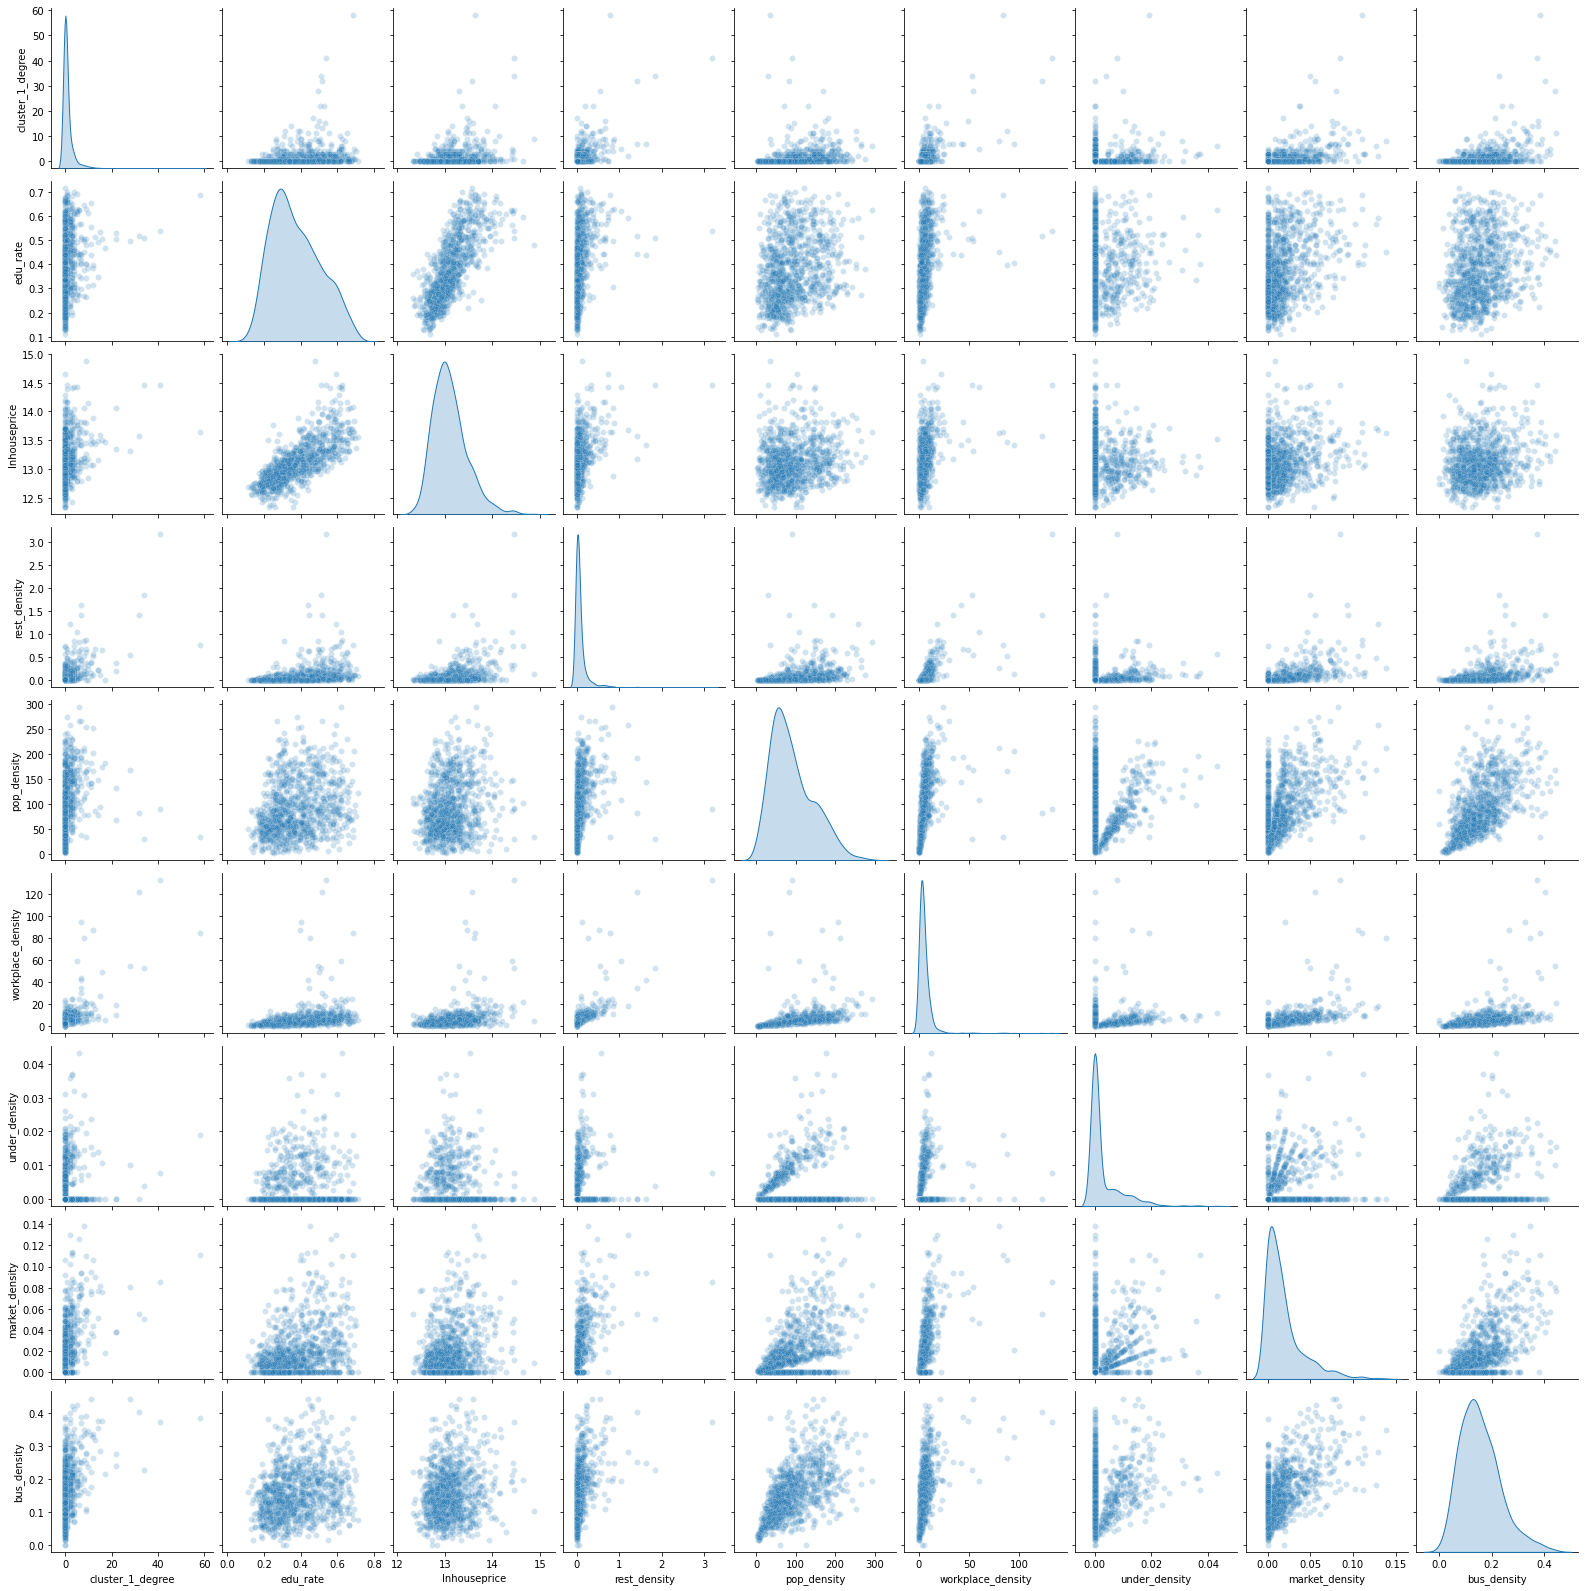

In [111]:
sns.pairplot(model_ols, diag_kind='kde', plot_kws={'alpha': 0.2})

In [112]:
#model_logistic1.to_csv("data/cluster_logistic.csv")

In [113]:
#model_logistic1.info()

Text(0.5, 1.0, 'Correlation Matrix')

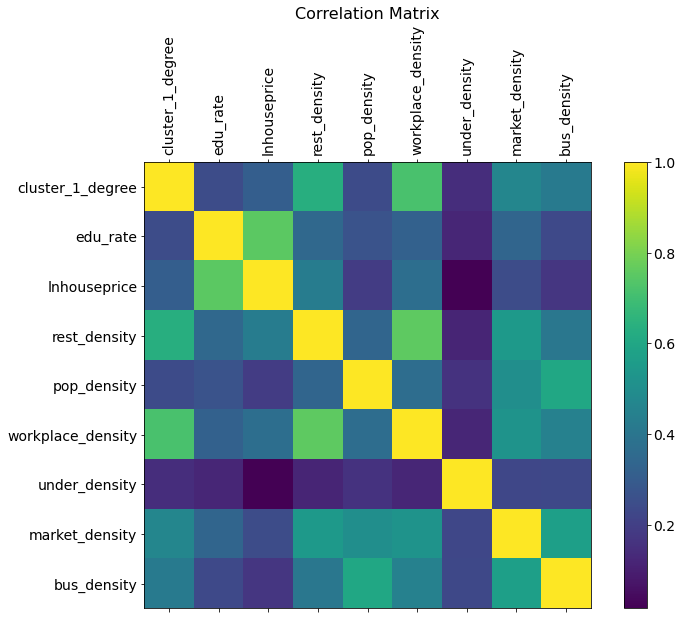

In [114]:
# assumption 1
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(12, 8))
plt.matshow(model_ols.corr(), fignum=f.number, cmap='viridis')
plt.xticks(range(model_ols.shape[1]), model_ols.columns, fontsize=14, rotation=90)
plt.yticks(range(model_ols.shape[1]), model_ols.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### VIF

In [115]:
# assumption 3
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = model_ols[['edu_rate','lnhouseprice', 'rest_density', 'pop_density',
       'workplace_density', 'under_density', 'market_density', 'bus_density']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature        VIF
0           edu_rate  11.848087
1       lnhouseprice  14.404205
2       rest_density   2.988411
3        pop_density   6.472734
4  workplace_density   3.452139
5      under_density   1.342516
6     market_density   3.308549
7        bus_density   9.838459


In [117]:
# using VIF to drop highly correlated variables

df_predictors_selected_VIF = drop_column_using_vif_(model_ols.drop('cluster_1_degree', axis=1), thresh=4)
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['edu_rate', 'lnhouseprice', 'rest_density', 'pop_density',
       'workplace_density', 'under_density', 'market_density', 'bus_density'],
      dtype='object')


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [118]:
#select x
cols_ind=['edu_rate', 'lnhouseprice', 'rest_density', 'pop_density',
       'workplace_density', 'under_density', 'market_density', 'bus_density']
ind_vars = model_ols[cols_ind]

In [119]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
model_1 = sm.OLS(endog=model_ols[['cluster_1_degree']], exog=sm.add_constant(ind_vars)).fit()
model_1.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       cluster_1_degree   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     154.7
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.21e-167
Time:                        18:48:36   Log-Likelihood:                -2272.4
No. Observations:                 983   AIC:                             4563.
Df Residuals:                     974   BIC:                             4607.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -10.1737      4.314     -2.358      0.019     -18.640      -1.708
edu_rate             -1.9144      0.936     -2.044      0.041      -3.752      -0.077
lnhouseprice          0.7725      0.347      2.226      0.026       0.091       1.454
rest_density          3.0884      0.660      4.681      0.000       1.794       4.383
pop_density          -0.0097      0.002     -5.127      0.000      -0.013      -0.006
workplace_density     0.2069      0.013     15.500      0.000       0.181       0.233
under_density        24.5138     14.079      1.741      0.082      -3.116      52.143
market_density       14.8495      4.918      3.020      0.003       5.199      24.500
bus_density           6.8890      1.411      4.882      0.000       4.120       9.658
==============================================================================
Omnibus:                      997.101   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119044.080
Skew:                           4.413   Prob(JB):                         0.00
Kurtosis:                      56.184   Cond. No.                     1.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = model_ols[['edu_rate', 'lnhouseprice', 'rest_density', 'pop_density',
       'workplace_density', 'under_density', 'market_density', 'bus_density']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature        VIF
0           edu_rate  11.848087
1       lnhouseprice  14.404205
2       rest_density   2.988411
3        pop_density   6.472734
4  workplace_density   3.452139
5      under_density   1.342516
6     market_density   3.308549
7        bus_density   9.838459


In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = model_ols[[ 'lnhouseprice', 'rest_density', 'pop_density',
       'workplace_density', 'under_density', 'market_density', 'bus_density']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature       VIF
0       lnhouseprice  5.895509
1       rest_density  2.946424
2        pop_density  6.417304
3  workplace_density  3.444630
4      under_density  1.338398
5     market_density  3.248663
6        bus_density  9.803923


In [122]:
#select x
cols_ind=['lnhouseprice', 'rest_density',  'pop_density',
       'workplace_density', 'under_density', 'market_density', 'bus_density']
ind_vars = model_ols[cols_ind]

In [123]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [124]:
model_3 = sm.OLS(endog=model_ols[['cluster_1_degree']], exog=sm.add_constant(ind_vars)).fit()
model_3.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       cluster_1_degree   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     175.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          7.01e-168
Time:                        18:55:09   Log-Likelihood:                -2274.5
No. Observations:                 983   AIC:                             4565.
Df Residuals:                     975   BIC:                             4604.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.1001      3.134     -1.308      0.191     -10.249       2.049
lnhouseprice          0.2591      0.240      1.080      0.281      -0.212       0.730
rest_density          3.1791      0.659      4.822      0.000       1.885       4.473
pop_density          -0.0100      0.002     -5.316      0.000      -0.014      -0.006
workplace_density     0.2072      0.013     15.503      0.000       0.181       0.233
under_density        21.1666     14.007      1.511      0.131      -6.320      48.653
market_density       13.1196      4.852      2.704      0.007       3.597      22.642
bus_density           6.9071      1.413      4.887      0.000       4.134       9.680
==============================================================================
Omnibus:                      990.976   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112880.541
Skew:                           4.383   Prob(JB):                         0.00
Kurtosis:                      54.760   Cond. No.                     1.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = model_ols[['rest_density', 'pop_density',
       'workplace_density', 'under_density', 'market_density', 'bus_density']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature       VIF
0       rest_density  2.928642
1        pop_density  5.857585
2  workplace_density  3.444225
3      under_density  1.337275
4     market_density  3.171493
5        bus_density  6.634870


In [126]:
#select x
cols_ind=['rest_density',  'pop_density',
       'workplace_density', 'under_density', 'market_density', 'bus_density']
ind_vars = model_ols[cols_ind]

In [127]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [128]:
model_3 = sm.OLS(endog=model_ols[['cluster_1_degree']], exog=sm.add_constant(ind_vars)).fit()
model_3.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       cluster_1_degree   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          8.39e-169
Time:                        18:55:12   Log-Likelihood:                -2275.1
No. Observations:                 983   AIC:                             4564.
Df Residuals:                     976   BIC:                             4598.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7234      0.189     -3.817      0.000      -1.095      -0.351
rest_density          3.3458      0.641      5.219      0.000       2.088       4.604
pop_density          -0.0099      0.002     -5.259      0.000      -0.014      -0.006
workplace_density     0.2084      0.013     15.640      0.000       0.182       0.235
under_density        20.5470     13.996      1.468      0.142      -6.919      48.013
market_density       13.1400      4.853      2.708      0.007       3.617      22.663
bus_density           6.8387      1.412      4.843      0.000       4.068       9.609
==============================================================================
Omnibus:                      992.508   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112389.468
Skew:                           4.398   Prob(JB):                         0.00
Kurtosis:                      54.639   Cond. No.                     1.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

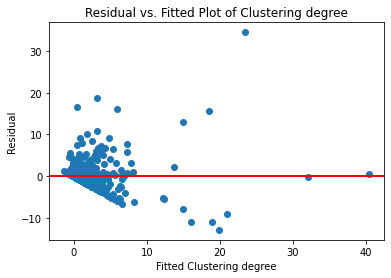

In [129]:
# 假设2
import seaborn as sn

#sn.set_theme(style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)
# plot 
plt.scatter(model_3.fittedvalues, model_3.resid)
# adding title and labels
plt.xlabel('Fitted Clustering degree')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Clustering degree')
plt.axhline(y = 0, color = 'r', linewidth = 2)
plt.show()

In [130]:
model_ols.to_csv("final_data/model.csv")

## Global Spatial Autocorrelation

In [131]:
# Graphics
import matplotlib.pyplot as plt
import seaborn
from pysal.viz import splot
from splot.esda import plot_moran
import contextily
# Analysis
import geopandas
import pandas
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed

/opt/anaconda3/lib/python3.8/site-packages/spaghetti/network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [146]:
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(model_gwr, k=4)
# Row-standardization
w.transform = 'R'

In [147]:
w.transform = 'R'
moran = esda.moran.Moran(model_gwr['cluster_1_degree'], w)

In [148]:
moran.I

0.4701554289295774

In [149]:
moran.p_sim

0.001

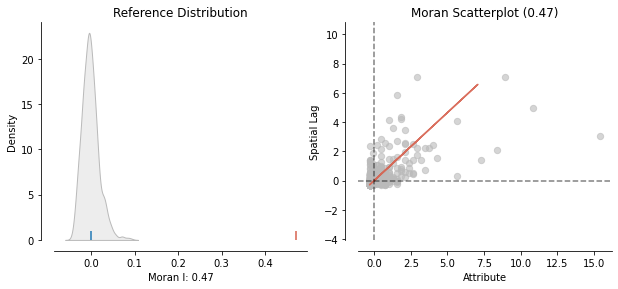

In [150]:
plot_moran(moran);

## GWR

In [132]:
# import packages needed 
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm
import mapclassify as mc
import shapely as shp
from legendgram import legendgram
import palettable.matplotlib as palmpl
import esda
import libpysal as lps
from mgwr.sel_bw import Sel_BW
from mgwr.gwr import GWR, MGWR
from mgwr.utils import shift_colormap, truncate_colormap
import libpysal as ps
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [133]:
model_gwr = pd.merge(model, london_areas, left_on='MSOA11CD', right_on='MSOA11CD', how='left')

In [134]:
model_gwr = model_gwr[['MSOA11CD', 'cluster_1_degree', 'rest_density',  'pop_density',
       'workplace_density', 'under_density', 'market_density', 'bus_density', 'geometry']]
model_gwr = GeoDataFrame(model_gwr)

In [135]:
model_gwr

MSOA11CD  cluster_1_degree  rest_density  pop_density  \
0    E02000001              58.0      0.771086    34.708384   
1    E02000002               0.0      0.000000    35.743697   
2    E02000003               0.0      0.014009    52.514593   
3    E02000004               0.0      0.000000    26.660783   
4    E02000005               0.0      0.008417    88.713071   
..         ...               ...           ...          ...   
978  E02006927               0.0      0.003967    42.362461   
979  E02006928               2.0      0.000000   169.138277   
980  E02006929               0.0      0.080226    37.758659   
981  E02006930               2.0      0.149821   106.753486   
982  E02006931               3.0      0.009760    47.650188   

     workplace_density  under_density  market_density  bus_density  \
0            84.089611       0.019039        0.111062     0.383956   
1             1.110340       0.000000        0.004626     0.092528   
2             2.661686       0.000000        0.009339     0.084053   
3             0.681964       0.000000        0.004012     0.056162   
4             2.693376       0.000000        0.025250     0.092585   
..                 ...            ...             ...          ...   
978           1.705605       0.003967        0.011900     0.150728   
979           8.684035       0.013360        0.066800     0.187041   
980           2.641917       0.002766        0.024898     0.094058   
981           6.626714       0.011525        0.069148     0.265069   
982           3.586941       0.000000        0.019521     0.131765   

                                              geometry  
0    MULTIPOLYGON (((531667.624 180534.992, 531647....  
1    POLYGON ((548881.563 190845.265, 548881.125 19...  
2    POLYGON ((549102.438 189324.625, 548954.500 18...  
3    POLYGON ((551549.998 187364.637, 551478.000 18...  
4    POLYGON ((549099.634 187656.076, 549161.375 18...  
..                                                 ...  
978  POLYGON ((541029.881 176265.023, 541101.997 17...  
979  MULTIPOLYGON (((538300.370 177956.632, 538290....  
980  POLYGON ((540054.366 179353.136, 540220.352 17...  
981  POLYGON ((539552.478 178604.042, 539533.000 17...  
982  POLYGON ((538834.754 177736.770, 538880.250 17...  

[983 rows x 9 columns]

In [136]:
model_gwr.to_csv("final_data/model_gwr.csv")

In [137]:
model_gwr.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [138]:
model_gwr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MSOA11CD           983 non-null    object  
 1   cluster_1_degree   983 non-null    float64 
 2   rest_density       983 non-null    float64 
 3   pop_density        983 non-null    float64 
 4   workplace_density  983 non-null    float64 
 5   under_density      983 non-null    float64 
 6   market_density     983 non-null    float64 
 7   bus_density        983 non-null    float64 
 8   geometry           983 non-null    geometry
dtypes: float64(7), geometry(1), object(1)
memory usage: 76.8+ KB


In [139]:
#set coordinates
model_gwr['centro'] = model_gwr.centroid
model_gwr['X'] = model_gwr.centro.x
model_gwr['Y'] = model_gwr.centro.y
coords = list(zip(model_gwr['X'],model_gwr['Y']))

In [140]:
coords

[(532482.7039370307, 181269.30993319114),
 (548312.9145429025, 189881.378500495),
 (548454.9248834187, 188400.1497980891),
 (551008.9716997311, 186310.93434708138),
 (548667.08928095, 186903.34352424517),
 (549648.7339064422, 186561.029560711),
 (548139.5796545328, 185911.09384374987),
 (546964.9446168141, 185757.09077854056),
 (549064.212214761, 185295.4667217302),
 (550508.5304326424, 185162.3378606031),
 (545635.9769085126, 184893.29127319163),
 (547277.3030520927, 184854.72133511084),
 (548785.4294827204, 184554.688920265),
 (550075.9642336668, 184230.84695468997),
 (544028.7378152418, 184316.86429492343),
 (544838.1966741384, 184459.67272504861),
 (546552.9531308248, 184299.0753981132),
 (548167.5602120465, 183256.82015809815),
 (546104.067956295, 182741.587229474),
 (549508.4284595317, 182827.5190094353),
 (544383.7384956944, 183516.51502490806),
 (546653.1930618901, 183109.22461394765),
 (524414.9220711514, 197000.69597755908),
 (525971.1502461971, 196718.55838256533),
 (527682.

In [142]:
#Normalize x and y
y = np.array(model_gwr['cluster_1_degree']).reshape((-1,1))
rest = np.array(model_gwr['rest_density']).reshape((-1,1))
#edu = np.array(model_gwr['edu_rate']).reshape((-1,1))
pop = np.array(model_gwr['pop_density']).reshape((-1,1))
#income = np.array(model_gwr['income_density']).reshape((-1,1))
work = np.array(model_gwr['workplace_density']).reshape((-1,1))
#employ = np.array(model_gwr['employee_density']).reshape((-1,1))
#trans = np.array(model_gwr['PTAI']).reshape((-1,1))
#rail = np.array(model_gwr['rail_sta']).reshape((-1,1))
under = np.array(model_gwr['under_density']).reshape((-1,1))
market = np.array(model_gwr['market_density']).reshape((-1,1))
bus = np.array(model_gwr['bus_density']).reshape((-1,1))
X = np.hstack([rest, pop, work, under, bus, market])


#'rest_degree', 'income_degree', 'workplace_degree', 
  #     'under_degree', 'market_degree', 'bus_degree'

X = (X - X.mean(axis=0)) / X.std(axis=0)
y = y.reshape((-1,1))
y = (y - y.mean(axis=0)) / y.std(axis=0)

In [143]:
sel = Sel_BW(coords, y, X, kernel = 'gaussian')
bw = sel.search()
print('bw:', bw)
gwr = GWR(coords, y, X, bw, kernel = 'gaussian')
gwr_results = gwr.fit()
print('aicc:', gwr_results.aicc)
print('ENP:', gwr_results.ENP)
print('sigma2:', gwr_results.sigma2)

bw: 55.0
aicc: 1807.6055771753108
ENP: 41.339642605316136
sigma2: 0.3512829679262743


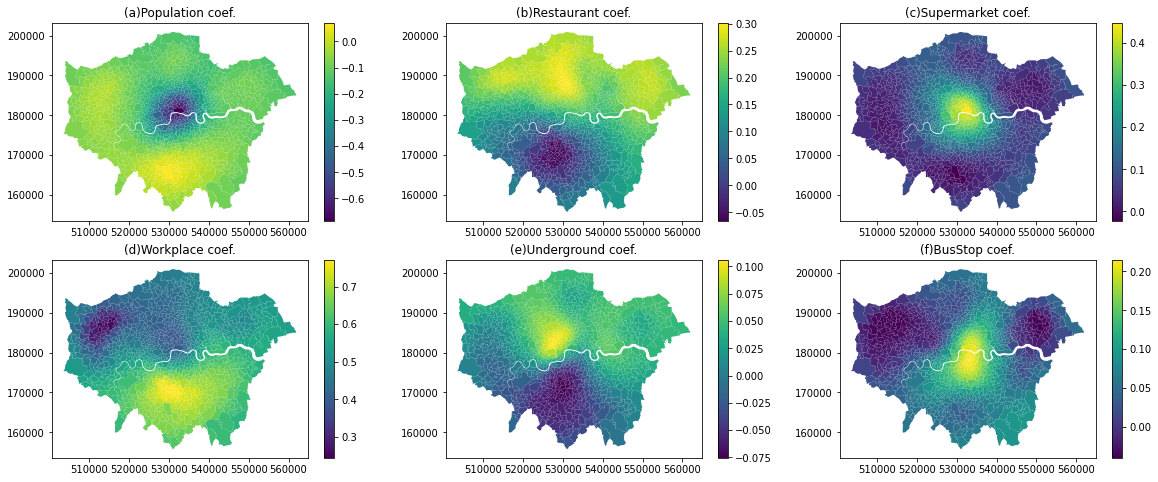

In [144]:
#改cmap
f,ax = plt.subplots(2,3,figsize=(20,8))
model_gwr['Restaurant_par'] = gwr_results.params[:, 1]
model_gwr['Population_par'] = gwr_results.params[:, 2]
model_gwr['Workplace_par'] = gwr_results.params[:, 3]
model_gwr['Underground_par'] = gwr_results.params[:, 4]
model_gwr['Supermarket_par'] = gwr_results.params[:, 5]
model_gwr['BusStop_par'] = gwr_results.params[:, 6]

ax1=plt.subplot(2, 3,2)
ax2=plt.subplot(2, 3,1)
ax3=plt.subplot(2, 3,4)
ax4=plt.subplot(2, 3,5)
ax5=plt.subplot(2, 3,3)
ax6=plt.subplot(2, 3,6)


model_gwr.plot('Restaurant_par',ax=ax1,legend = True)
ax1.set_title("(b)Restaurant coef.")
model_gwr.plot('Population_par',ax=ax2,legend = True)
ax2.set_title("(a)Population coef.")
model_gwr.plot('Workplace_par',ax=ax3,legend = True)
ax3.set_title("(d)Workplace coef.")
model_gwr.plot('Underground_par',ax=ax4,legend = True)
ax4.set_title("(e)Underground coef.")
model_gwr.plot('Supermarket_par',ax=ax5,legend = True)
ax5.set_title("(c)Supermarket coef.")
model_gwr.plot('BusStop_par',ax=ax6,legend = True)
ax6.set_title("(f)BusStop coef.")

f.savefig('GWRcoef.png', dpi=300)

In [145]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 983
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            435.278
Log-likelihood:                                                    -994.429
AIC:                                                               2002.857
AICc:                                                              2005.005
BIC:                                                              -6289.957
R2:                                                                   0.557
Adj. R2:                                                              0.554

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------